In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


In [3]:

f = '../../ERA5 date/precip_diaria.csv'
dados = pd.read_csv(f, encoding="latin1")
df = dados

In [8]:
df[0:50]

Date  Latitude  Longitude  Precipitation
0  2004-01-01 11:30:00     -9.13     -77.65       6.356016
1  2004-01-01 11:30:00     -9.13     -77.40       3.878843
2  2004-01-01 11:30:00     -9.38     -77.65       3.138585
3  2004-01-01 11:30:00     -9.38     -77.40       4.217723
4  2004-01-01 11:30:00     -9.63     -77.65       5.522382
5  2004-01-01 11:30:00     -9.63     -77.40       7.183880
6  2004-01-01 11:30:00     -9.88     -77.65       7.863356
7  2004-01-01 11:30:00     -9.88     -77.40       7.974097
8  2004-01-02 11:30:00     -9.13     -77.65      11.964359
9  2004-01-02 11:30:00     -9.13     -77.40       5.114022
10 2004-01-02 11:30:00     -9.38     -77.65       4.706263
11 2004-01-02 11:30:00     -9.38     -77.40       4.794144
12 2004-01-02 11:30:00     -9.63     -77.65       8.935770
13 2004-01-02 11:30:00     -9.63     -77.40      10.357091
14 2004-01-02 11:30:00     -9.88     -77.65      13.225664
15 2004-01-02 11:30:00     -9.88     -77.40      11.782031
16 2004-01-03 11:30:00     -9.13     -77.65      10.400908
17 2004-01-03 11:30:00     -9.13     -77.40       5.441849
18 2004-01-03 11:30:00     -9.38     -77.65       5.649037
19 2004-01-03 11:30:00     -9.38     -77.40       5.540033
20 2004-01-03 11:30:00     -9.63     -77.65       7.271220
21 2004-01-03 11:30:00     -9.63     -77.40       8.071939
22 2004-01-03 11:30:00     -9.88     -77.65       9.094366
23 2004-01-03 11:30:00     -9.88     -77.40       9.104382
24 2004-01-04 11:30:00     -9.13     -77.65      13.870345
25 2004-01-04 11:30:00     -9.13     -77.40       9.960367
26 2004-01-04 11:30:00     -9.38     -77.65       9.880256
27 2004-01-04 11:30:00     -9.38     -77.40      10.643970
28 2004-01-04 11:30:00     -9.63     -77.65       8.421148
29 2004-01-04 11:30:00     -9.63     -77.40       9.725286
30 2004-01-04 11:30:00     -9.88     -77.65       7.531779
31 2004-01-04 11:30:00     -9.88     -77.40       9.670858
32 2004-01-05 11:30:00     -9.13     -77.65      16.332796
33 2004-01-05 11:30:00     -9.13     -77.40      18.034080
34 2004-01-05 11:30:00     -9.38     -77.65      11.024282
35 2004-01-05 11:30:00     -9.38     -77.40      12.391763
36 2004-01-05 11:30:00     -9.63     -77.65       4.021884
37 2004-01-05 11:30:00     -9.63     -77.40       4.915397
38 2004-01-05 11:30:00     -9.88     -77.65       1.808028
39 2004-01-05 11:30:00     -9.88     -77.40       3.418764
40 2004-01-06 11:30:00     -9.13     -77.65       6.274934
41 2004-01-06 11:30:00     -9.13     -77.40      10.429419
42 2004-01-06 11:30:00     -9.38     -77.65       4.629615
43 2004-01-06 11:30:00     -9.38     -77.40       6.084784
44 2004-01-06 11:30:00     -9.63     -77.65       2.171906
45 2004-01-06 11:30:00     -9.63     -77.40       3.263666
46 2004-01-06 11:30:00     -9.88     -77.65       1.603419
47 2004-01-06 11:30:00     -9.88     -77.40       3.027849
48 2004-01-07 11:30:00     -9.13     -77.65       7.812745
49 2004-01-07 11:30:00     -9.13     -77.40       9.007209

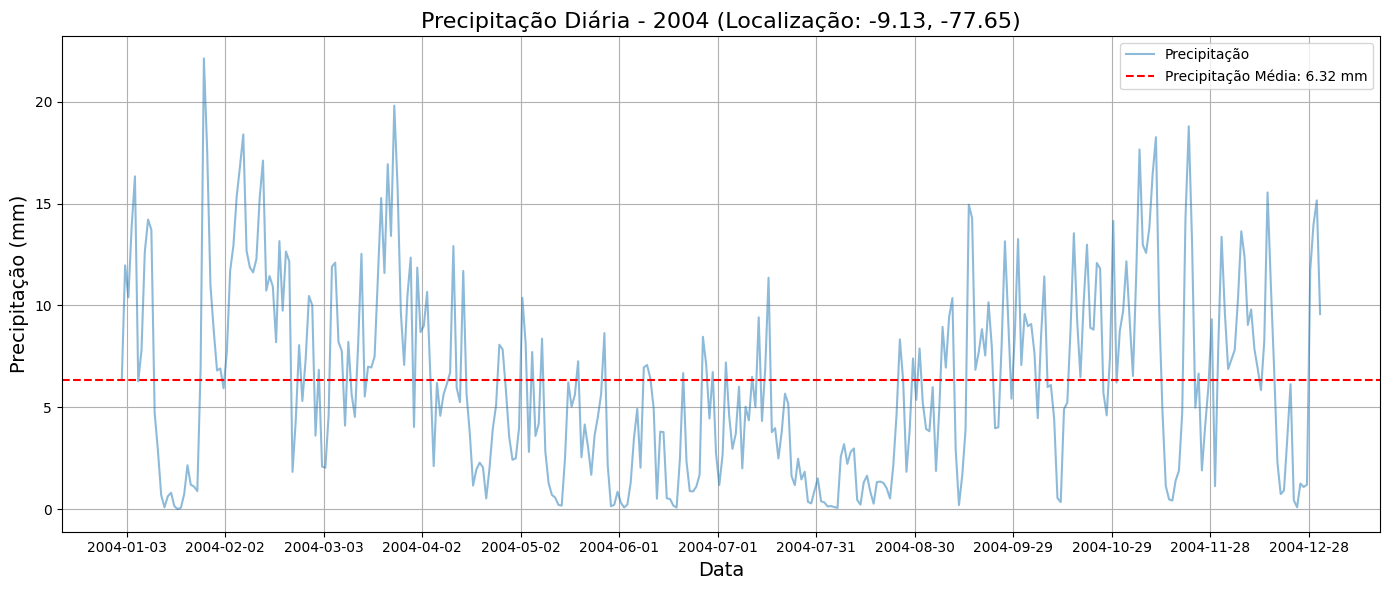

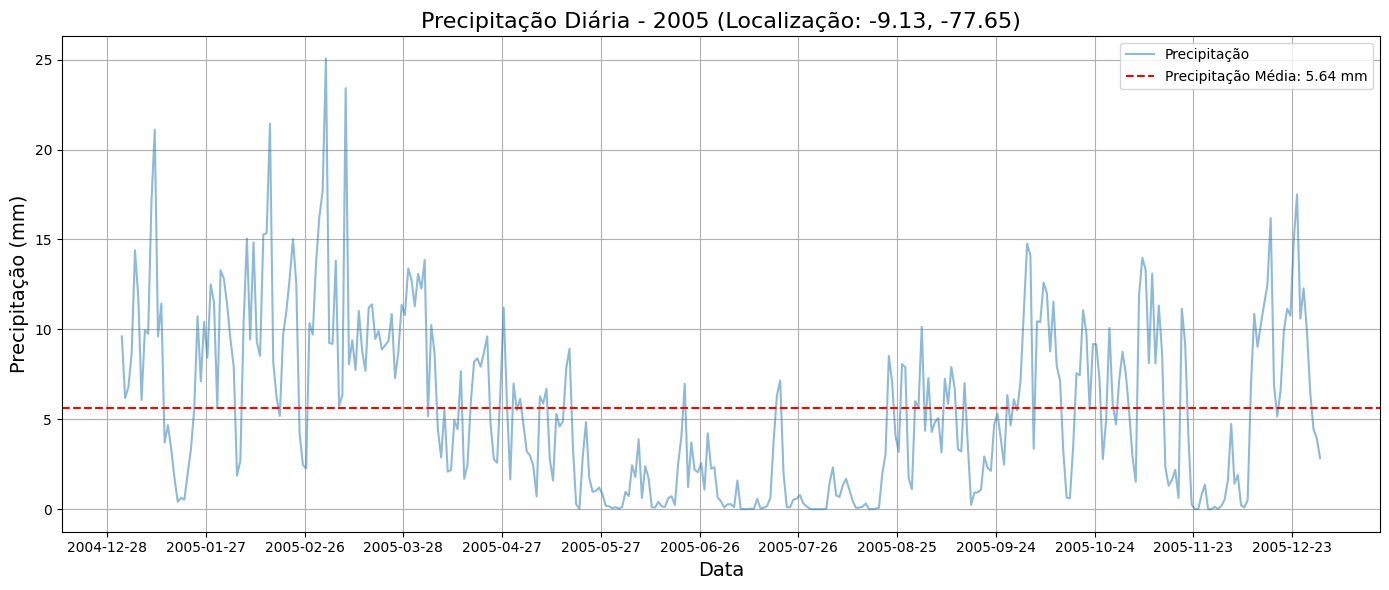

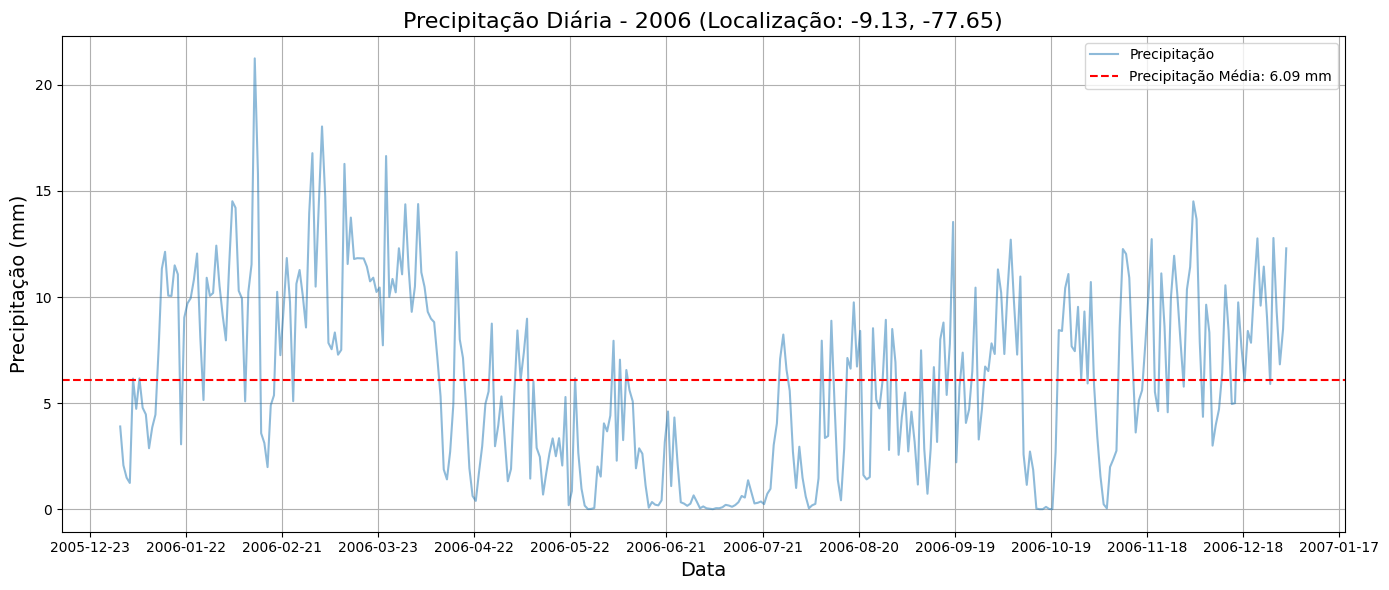

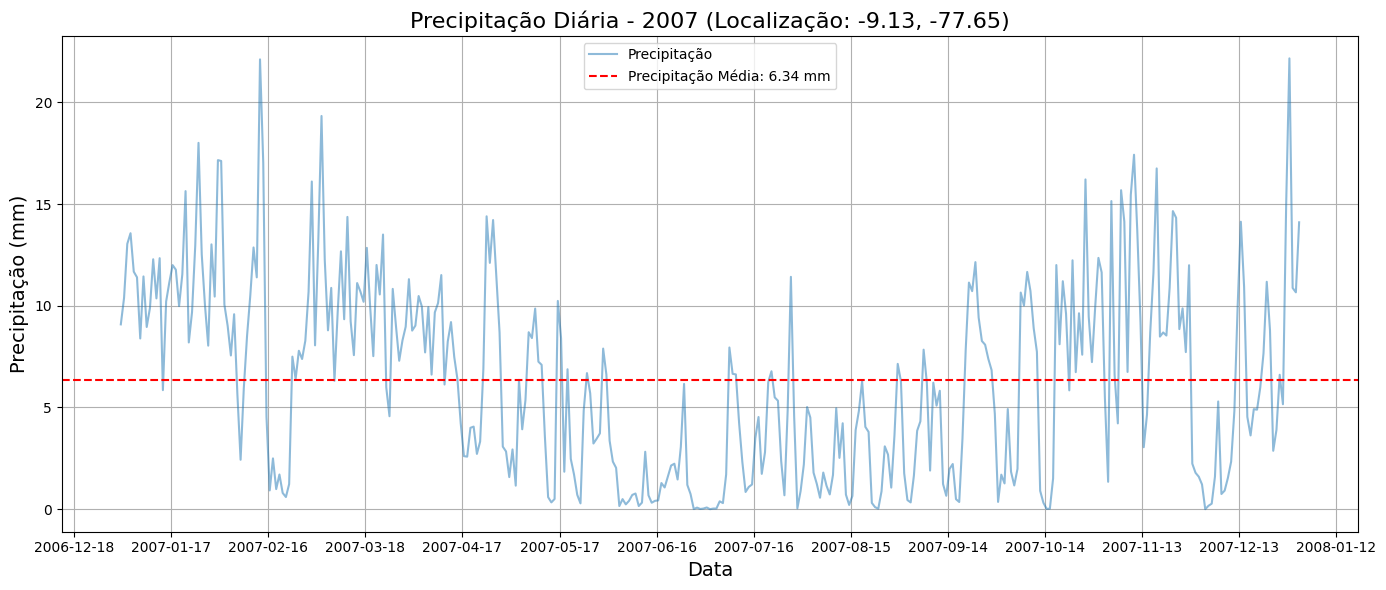

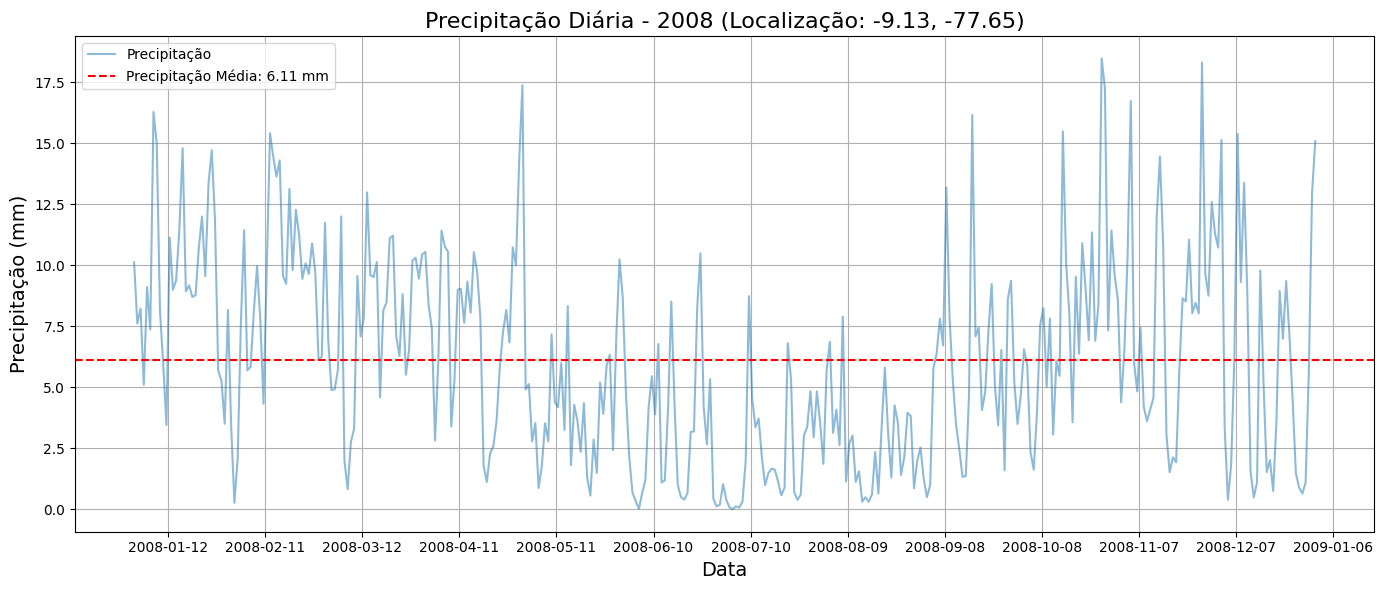

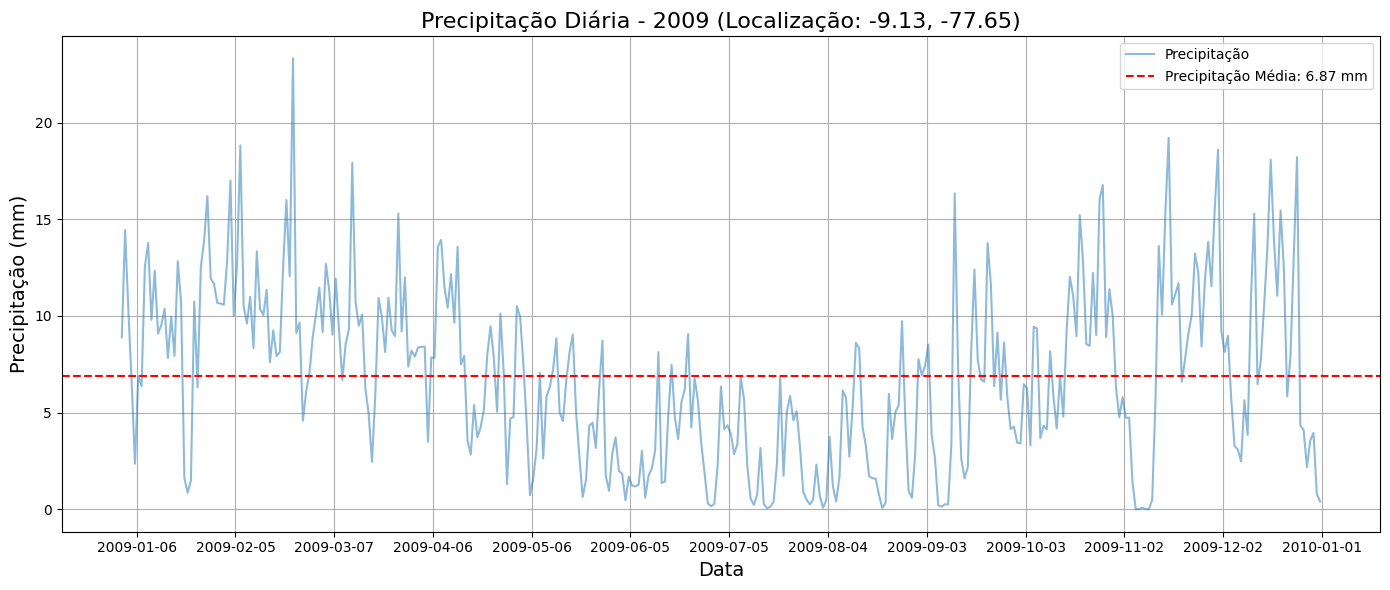

In [9]:


# Converter a coluna 'Date' para o formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtrar os dados para uma localização específica
lat_filter = -9.13  # Substitua pela latitude desejada
lon_filter = -77.65  # Substitua pela longitude desejada
df_filtered = df[(df['Latitude'] == lat_filter) & (df['Longitude'] == lon_filter)]

# Verificar se há dados para o filtro aplicado
if df_filtered.empty:
    print(f"Nenhum dado encontrado para a localização ({lat_filter}, {lon_filter}).")
else:
    # Obter os anos únicos presentes nos dados filtrados
    anos_unicos = df_filtered['Date'].dt.year.unique()

    # Criar gráficos separados para cada ano
    for ano in anos_unicos:
        # Filtrar os dados para o ano atual
        df_ano = df_filtered[df_filtered['Date'].dt.year == ano]

        # Criar o gráfico
        fig, ax = plt.subplots(figsize=(14, 6))
        ax.plot(df_ano['Date'], df_ano['Precipitation'], label='Precipitação', alpha=0.5)

        # Calcular a precipitação média para o ano
        precipitacao_media = df_ano['Precipitation'].mean()

        # Exibir quantas datas quiser no eixo X
        ax.xaxis.set_major_locator(plt.MaxNLocator(15))  

        # Adicionar a linha de precipitação média com valor na legenda
        ax.axhline(y=precipitacao_media, color='red', linestyle='--', label=f'Precipitação Média: {precipitacao_media:.2f} mm')

        # Adicionar título e rótulos
        plt.title(f'Precipitação Diária - {ano} (Localização: {lat_filter}, {lon_filter})', fontsize=16)
        plt.xlabel('Data', fontsize=14)
        plt.ylabel('Precipitação (mm)', fontsize=14)
        plt.legend()  # A legenda agora inclui o valor da precipitação média
        plt.grid()

        # Ajustar layout e exibir o gráfico
        plt.tight_layout()
        plt.show()


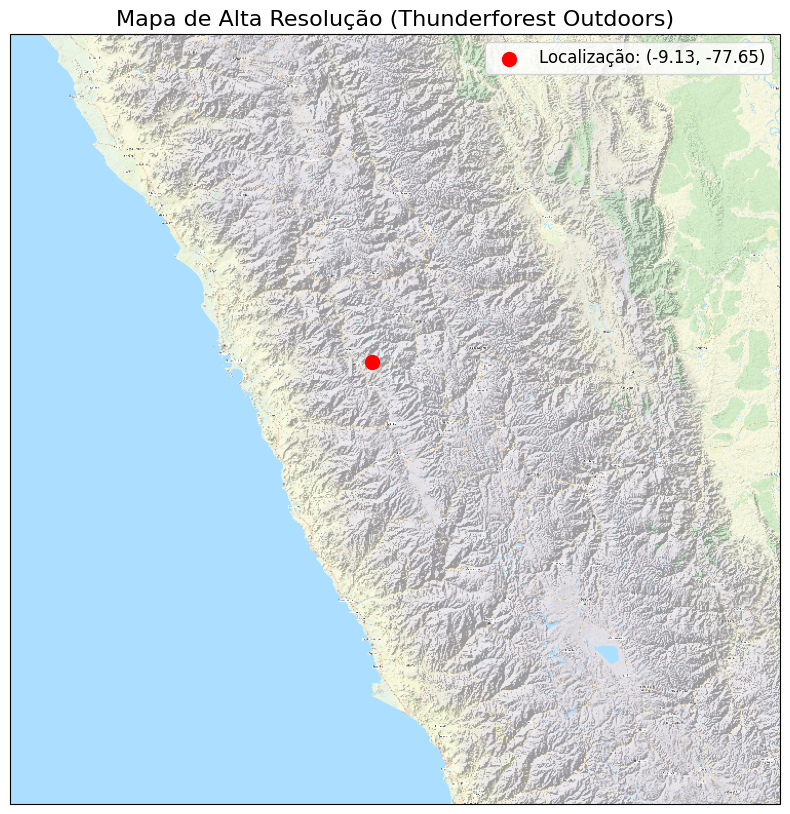

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

class Thunderforest(GoogleTiles):
    def __init__(self, api_key, layer='outdoors'):
        self.api_key = api_key
        self.layer = layer
        super().__init__()

    def _image_url(self, tile):
        x, y, z = tile
        url = (
            f"https://tile.thunderforest.com/{self.layer}/{z}/{x}/{y}.png?apikey={self.api_key}"
        )
        return url

# Configuração da localização
lat_filter = -9.13  # Latitude selecionada
lon_filter = -77.65  # Longitude selecionada

# Definir o domínio ampliado
lat_min, lat_max = -12, -7  # Limites de latitude
lon_min, lon_max = -80, -75  # Limites de longitude

# Criar o mapa
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adicionar tiles Thunderforest
tiler = Thunderforest(api_key='14889dd6a0834e0496d657dc18e492ab', layer='outdoors')
ax.add_image(tiler, 10)  # Nível de zoom

# Marcar a localização no mapa
ax.scatter(lon_filter, lat_filter, color='red', s=100, label=f"Localização: ({lat_filter}, {lon_filter})", transform=ccrs.PlateCarree())

# Adicionar título e legenda
plt.title("Mapa de Alta Resolução (Thunderforest Outdoors)", fontsize=16)
plt.legend(loc='upper right', fontsize=12)

plt.show()


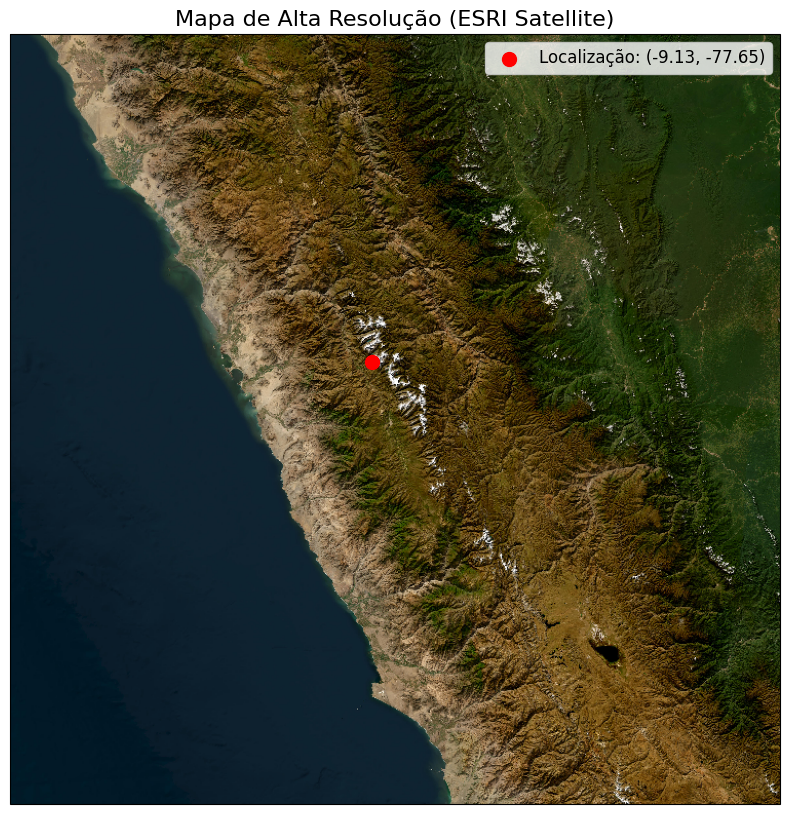

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

class ESRI(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = (
            f"https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}.jpg"
        )
        return url

# Configuração da localização
lat_filter = -9.13  # Latitude selecionada
lon_filter = -77.65  # Longitude selecionada

# Definir o domínio ampliado
lat_min, lat_max = -12, -7  # Limites de latitude
lon_min, lon_max = -80, -75  # Limites de longitude

# Criar o mapa
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Adicionar tiles de alta resolução da ESRI
tiler = ESRI()
ax.add_image(tiler, 10)  # Nível de zoom

# Marcar a localização no mapa
ax.scatter(lon_filter, lat_filter, color='red', s=100, label=f"Localização: ({lat_filter}, {lon_filter})", transform=ccrs.PlateCarree())

# Adicionar título e legenda
plt.title("Mapa de Alta Resolução (ESRI Satellite)", fontsize=16)
plt.legend(loc='upper right', fontsize=12)

plt.show()


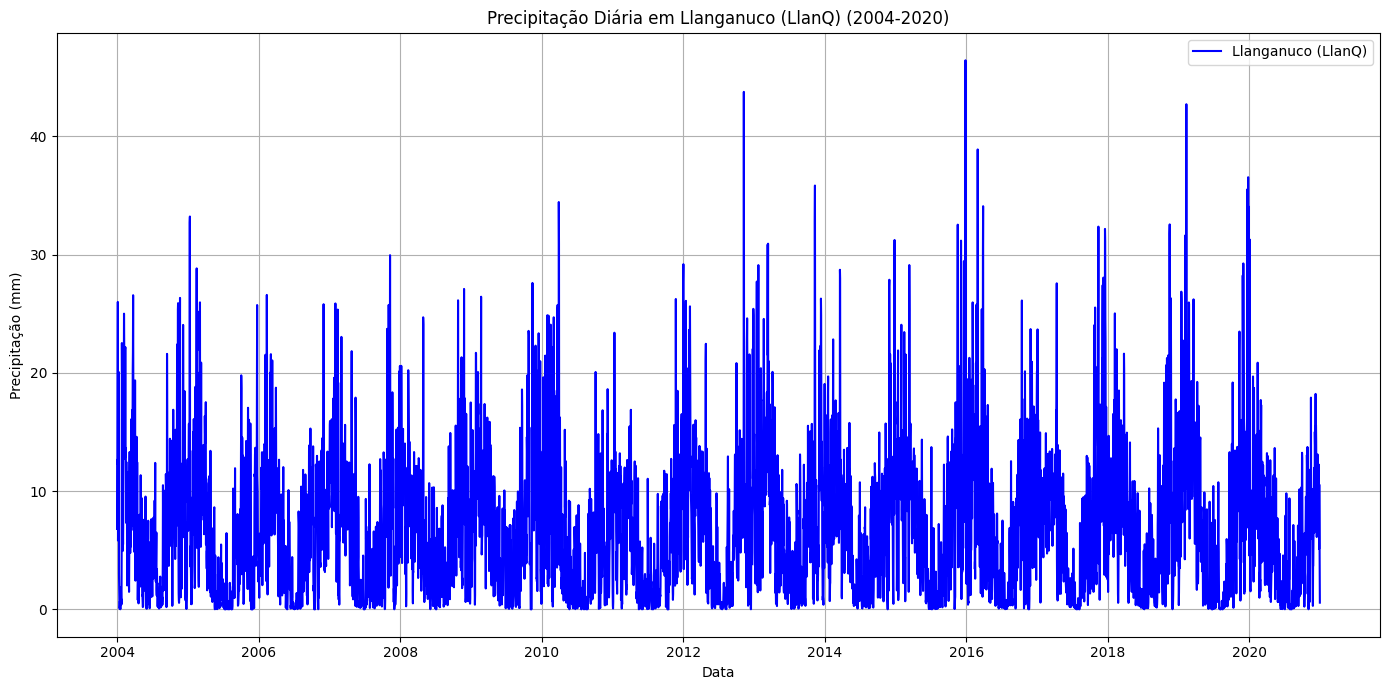

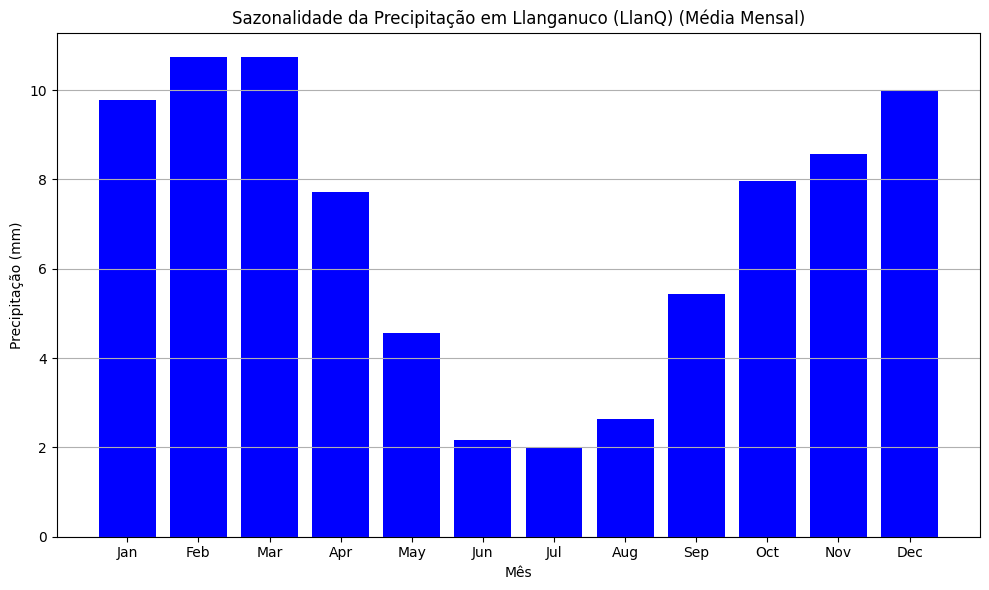

In [11]:
import ee
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar a API do Google Earth Engine
ee.Initialize()

# Definir as coordenadas das estações automáticas com cores associadas
stations = [
    {"name": "Llanganuco (LlanQ)", "lat": -9.07, "lon": -77.65, "color": "green"}
]

# Carregar dados ERA5-Land diário
era5_land_daily = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR") \
    .select("total_precipitation_sum")

# Função para processar os dados em intervalos menores
def get_daily_precipitation(image_collection, point, start_date, end_date):
    period_collection = image_collection.filterDate(start_date, end_date)
    
    def extract_data(image):
        date = ee.Date(image.get("system:time_start"))
        value = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=point,
            scale=9000,
            maxPixels=1e9
        ).get("total_precipitation_sum")
        return ee.Feature(None, {
            "date": date.format("YYYY-MM-dd"),
            "value": ee.Number(value).multiply(1000)  # Converter para mm
        })
    
    features = period_collection.map(extract_data).getInfo()["features"]
    data = [
        {
            "date": pd.to_datetime(feature["properties"]["date"]),
            "value": feature["properties"]["value"]
        }
        for feature in features if feature["properties"]["value"] is not None
    ]
    return pd.DataFrame(data)

# Definir intervalos menores para evitar o limite de elementos
date_ranges = [
    ("2004-01-01", "2006-12-31"),
    ("2007-01-01", "2009-12-31"),
    ("2010-01-01", "2012-12-31"),
    ("2013-01-01", "2015-12-31"),
    ("2016-01-01", "2020-12-31")
]

# Processar e criar gráficos para cada estação
for station in stations:
    point = ee.Geometry.Point([station["lon"], station["lat"]])
    dfs = []
    
    for start_date, end_date in date_ranges:
        df = get_daily_precipitation(era5_land_daily, point, start_date, end_date)
        dfs.append(df)
    
    # Concatenar todos os períodos
    final_df = pd.concat(dfs)
    
    # Gráfico de linha para precipitação diária
    plt.figure(figsize=(14, 7))
    plt.plot(final_df["date"], final_df["value"], color="blue", label=station["name"])
    plt.title(f"Precipitação Diária em {station['name']} (2004-2020)")
    plt.xlabel("Data")
    plt.ylabel("Precipitação (mm)")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Gráfico de barras para sazonalidade (média mensal)
    final_df["month"] = final_df["date"].dt.month
    monthly_avg = final_df.groupby("month")["value"].mean()

    plt.figure(figsize=(10, 6))
    plt.bar(monthly_avg.index, monthly_avg.values, color="blue")
    plt.title(f"Sazonalidade da Precipitação em {station['name']} (Média Mensal)")
    plt.xlabel("Mês")
    plt.ylabel("Precipitação (mm)")
    plt.xticks(range(1, 13), [
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()


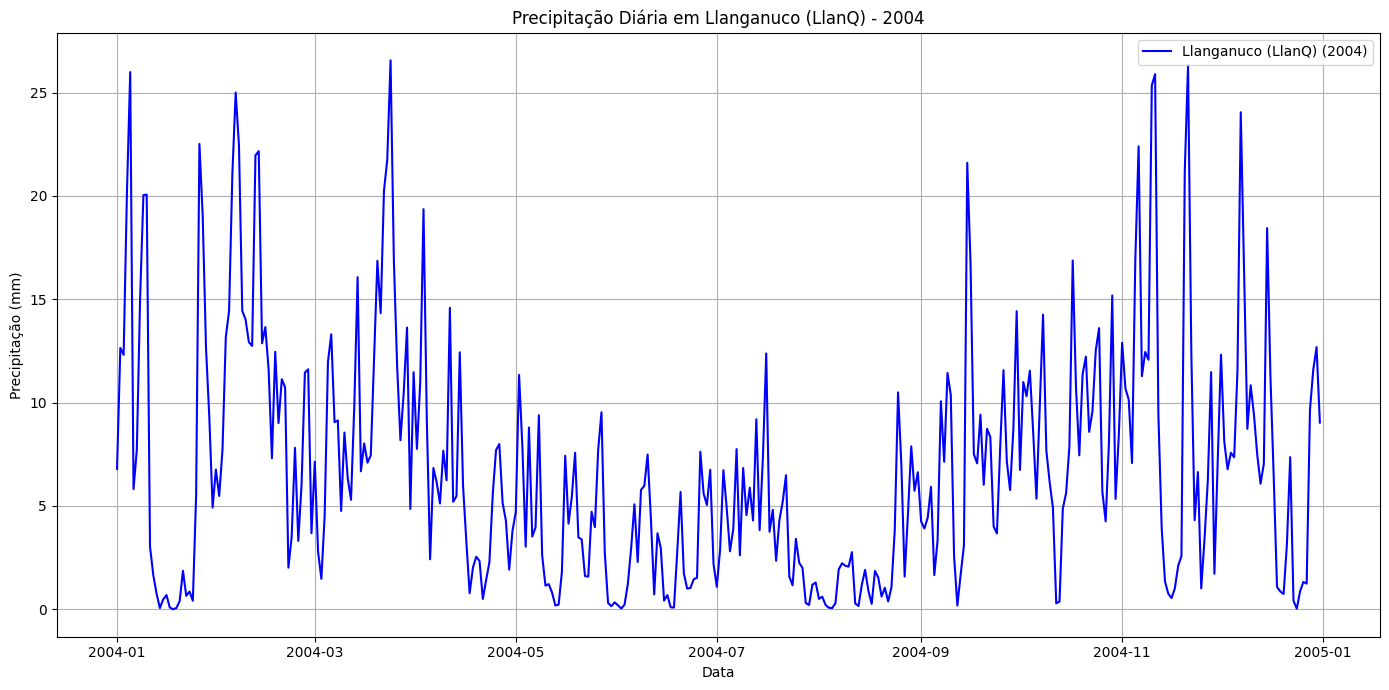

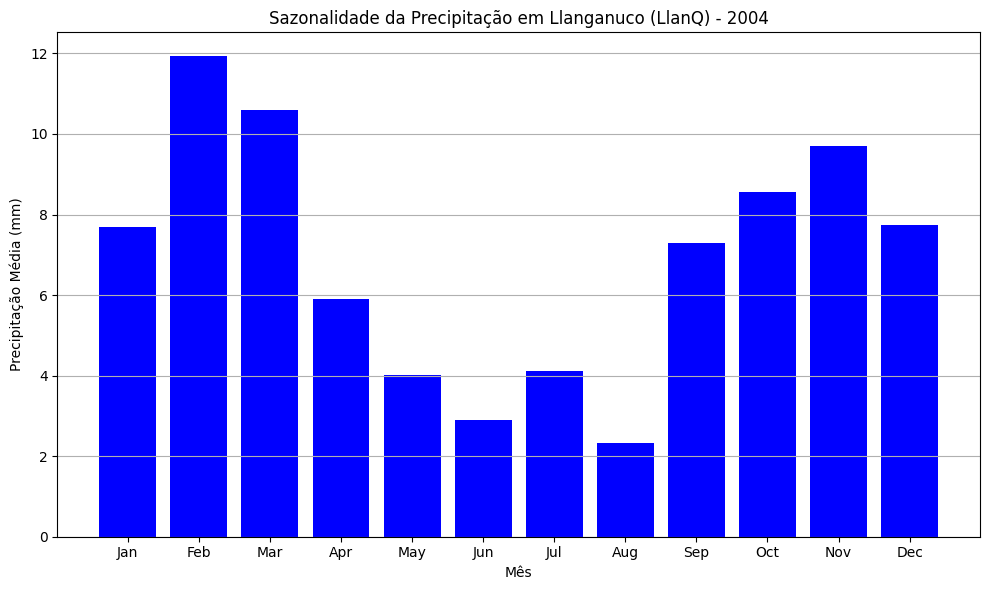

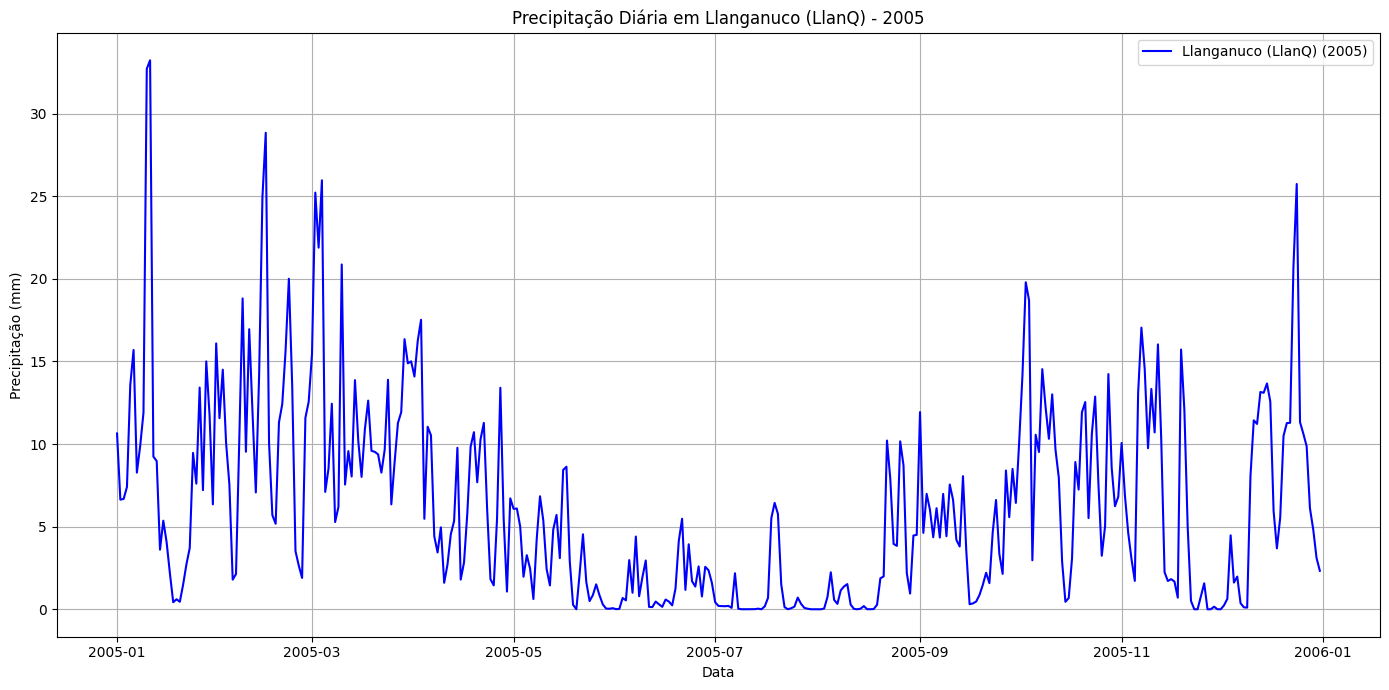

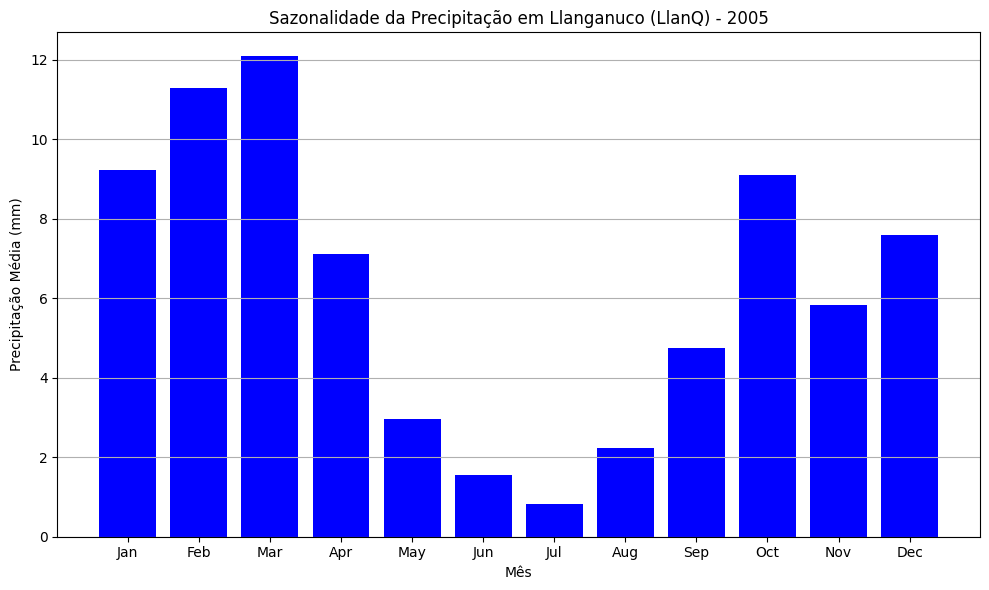

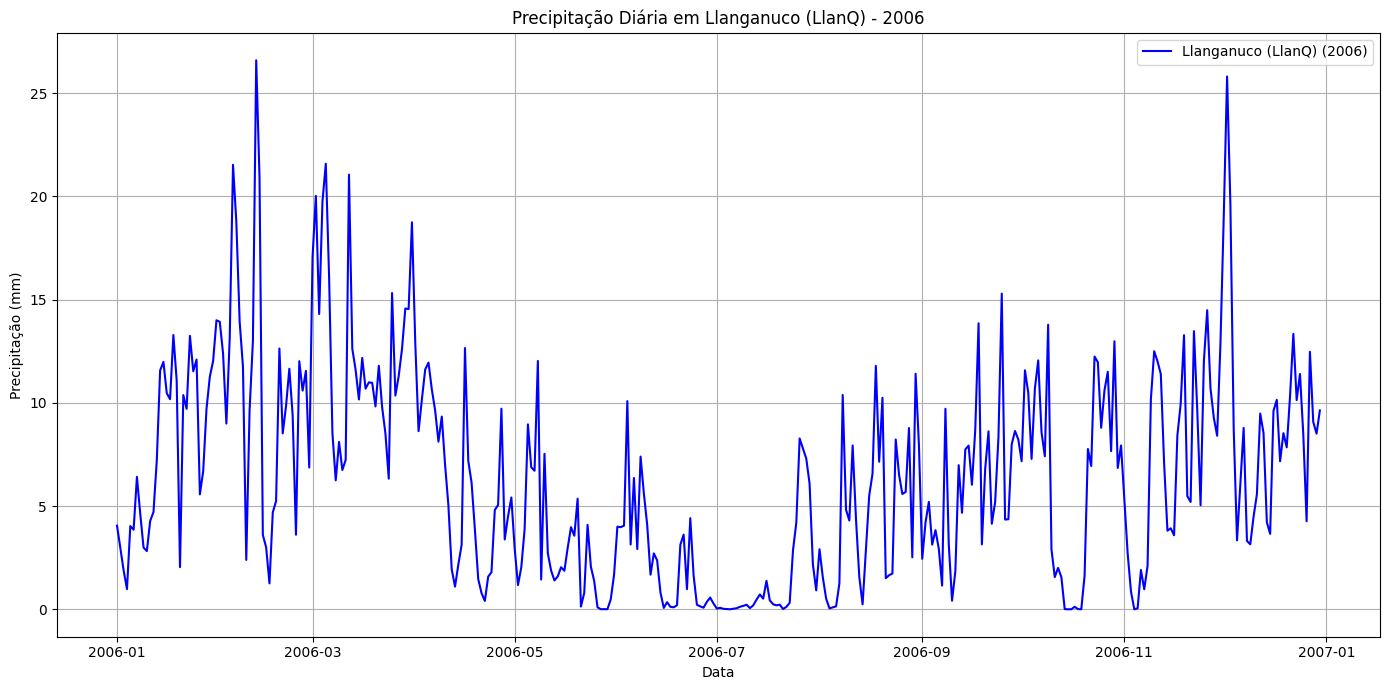

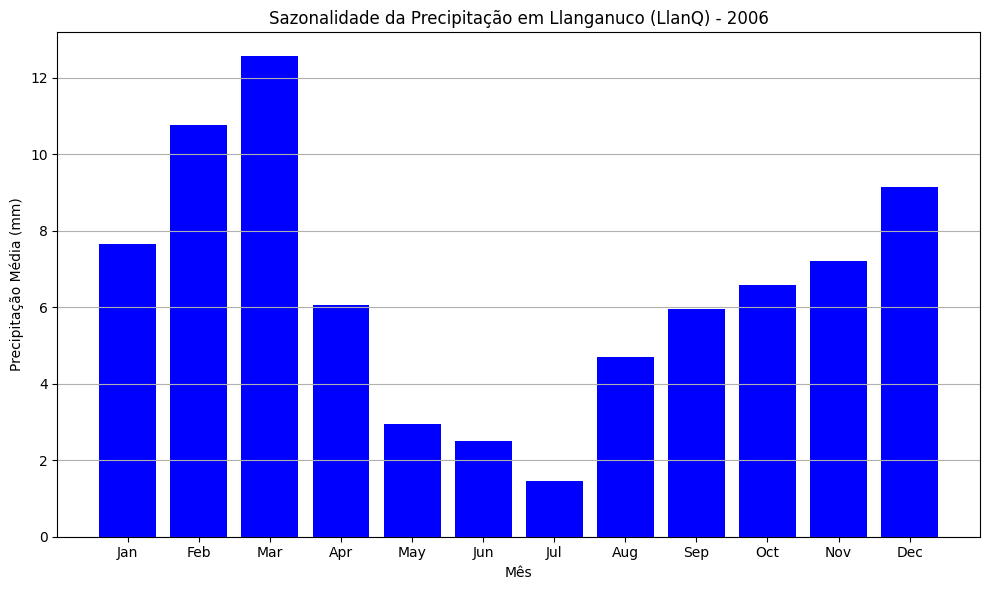

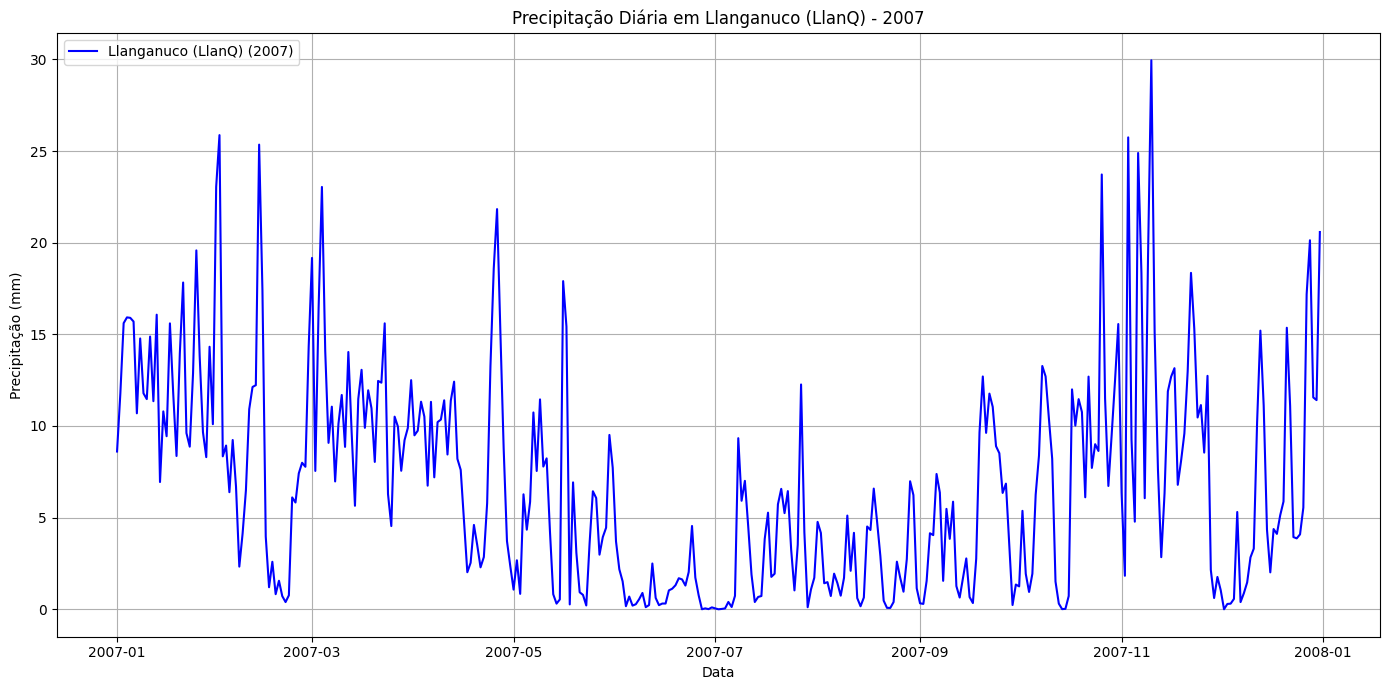

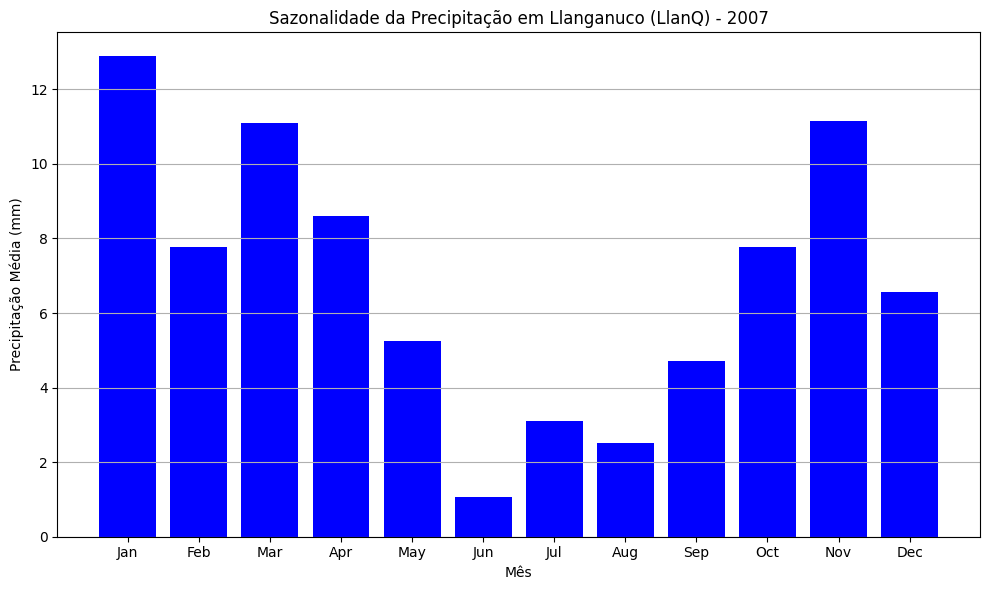

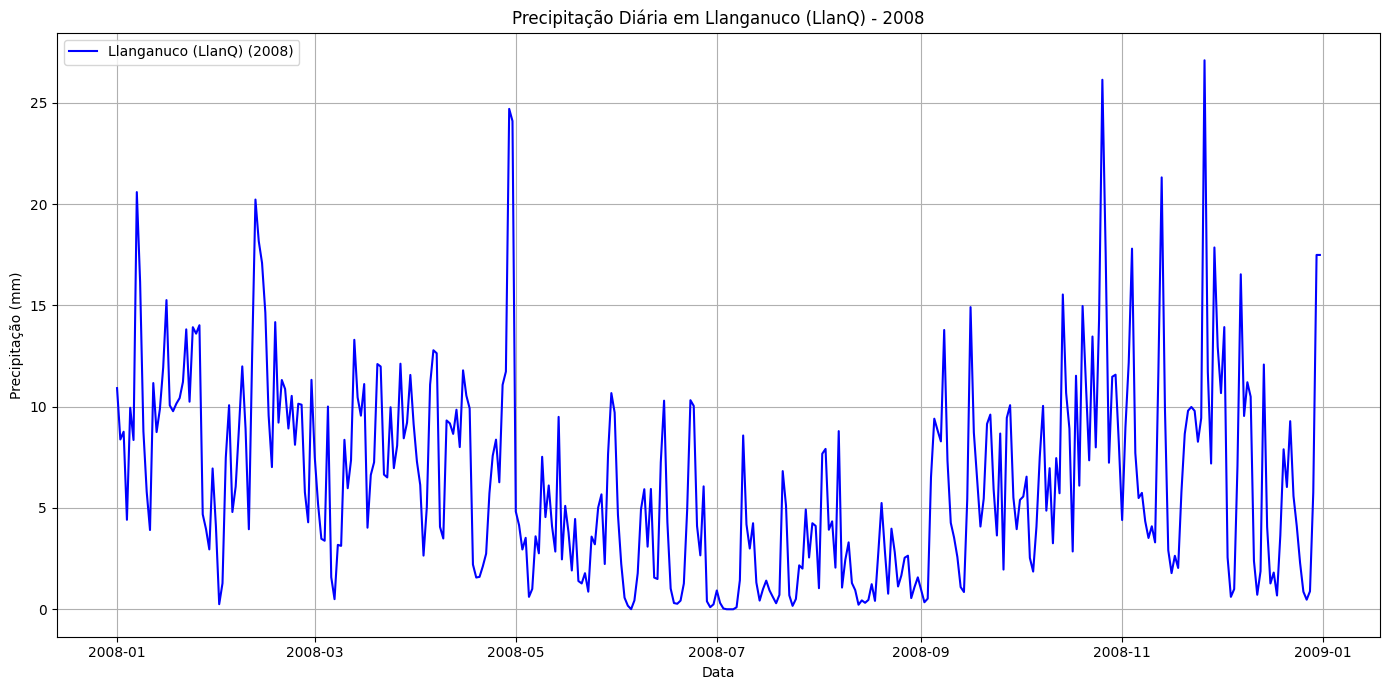

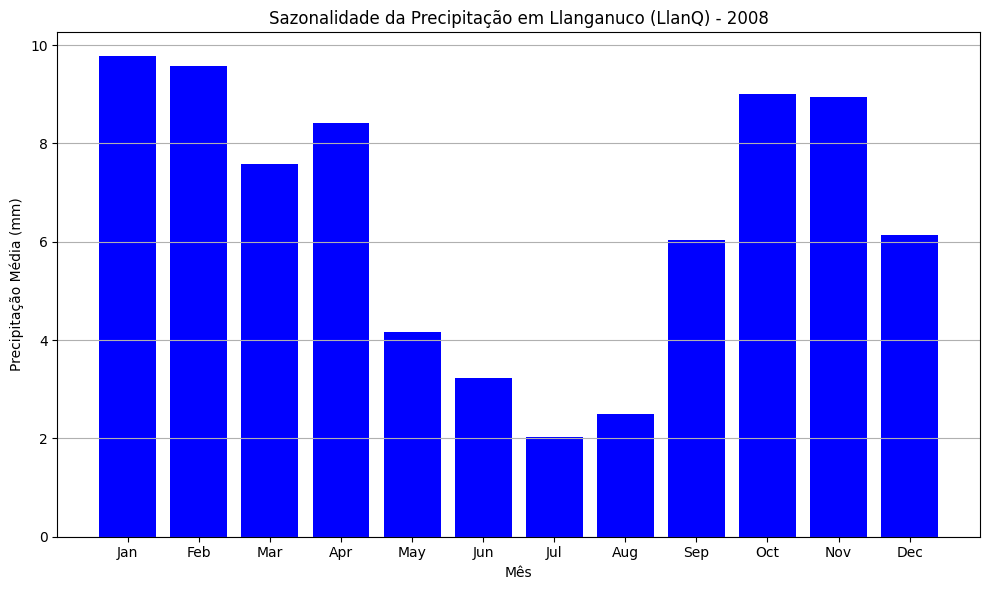

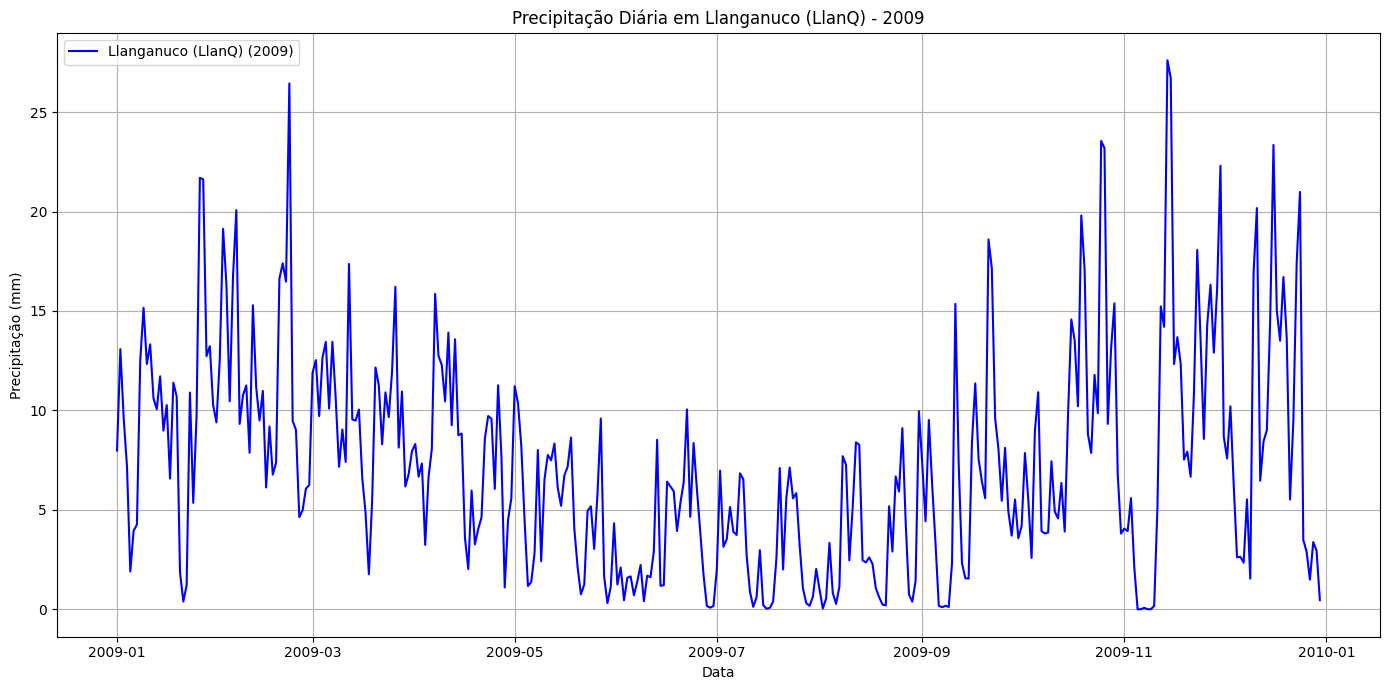

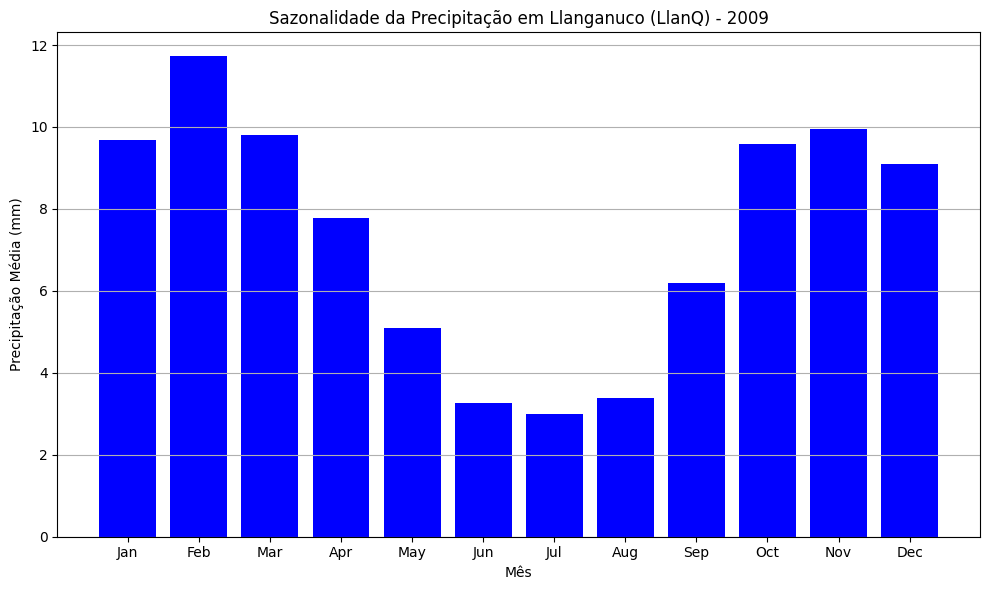

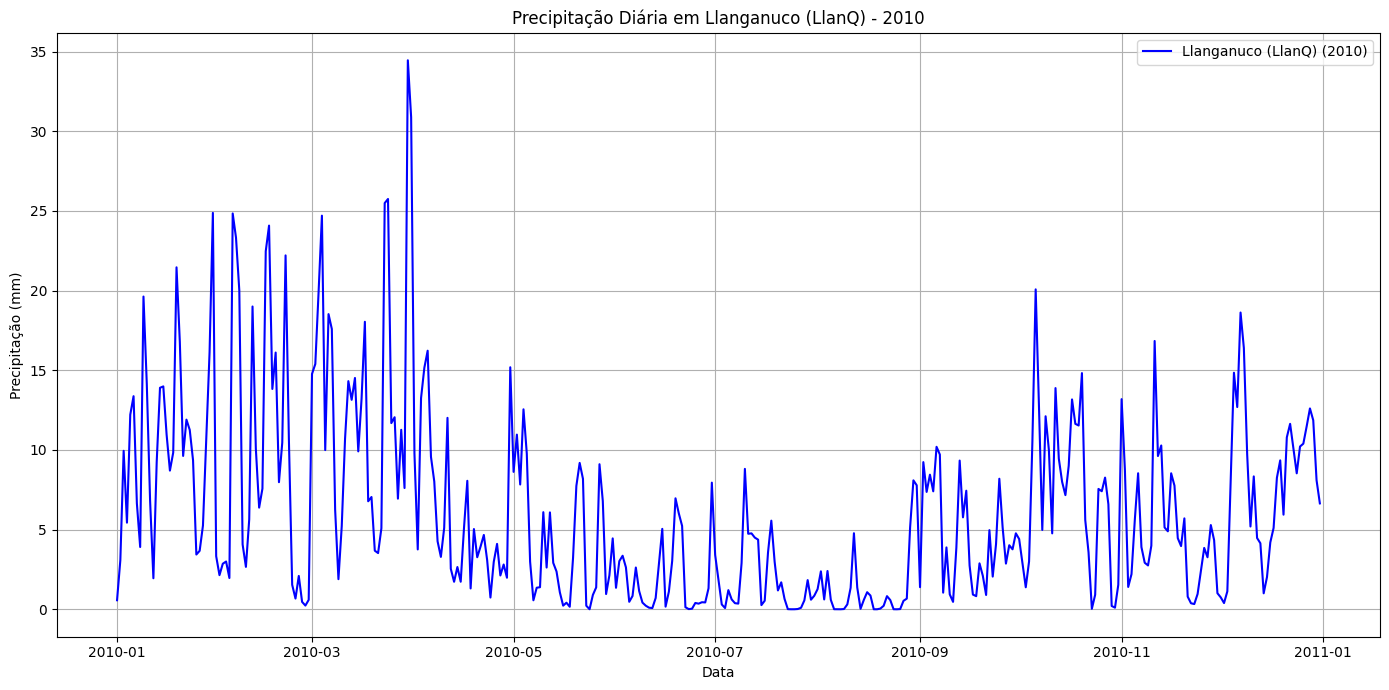

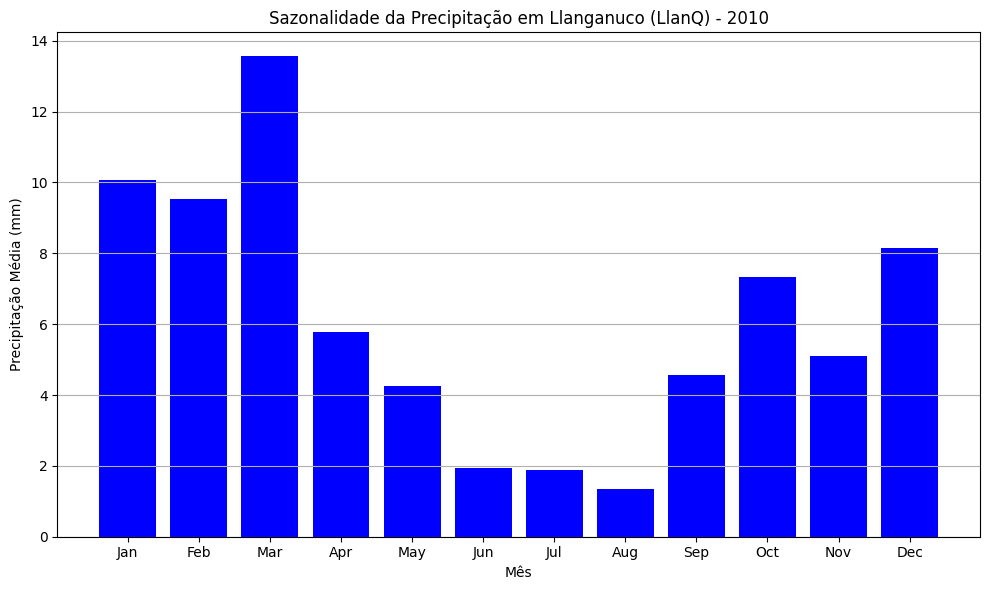

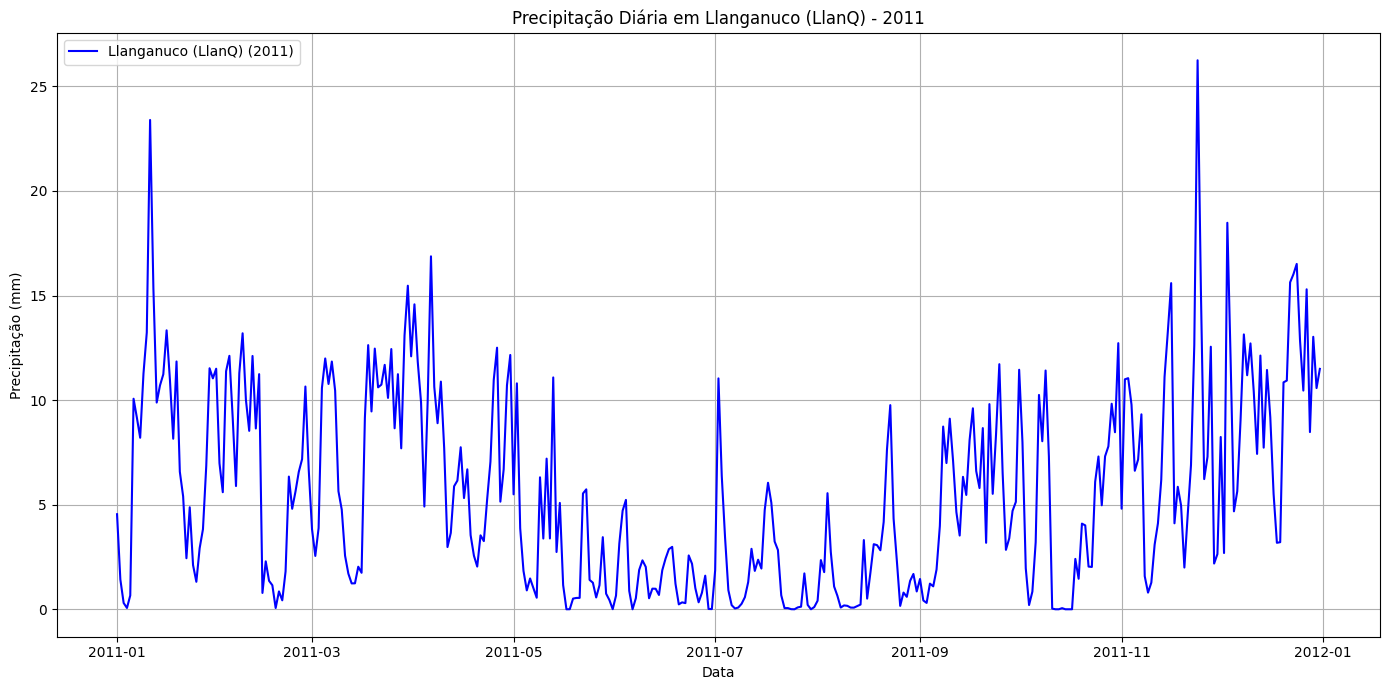

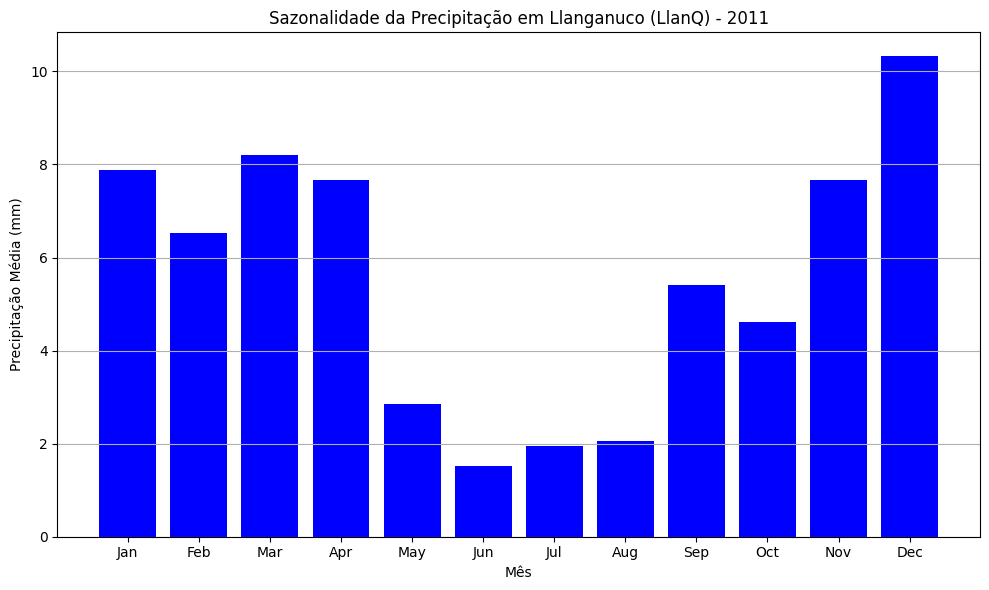

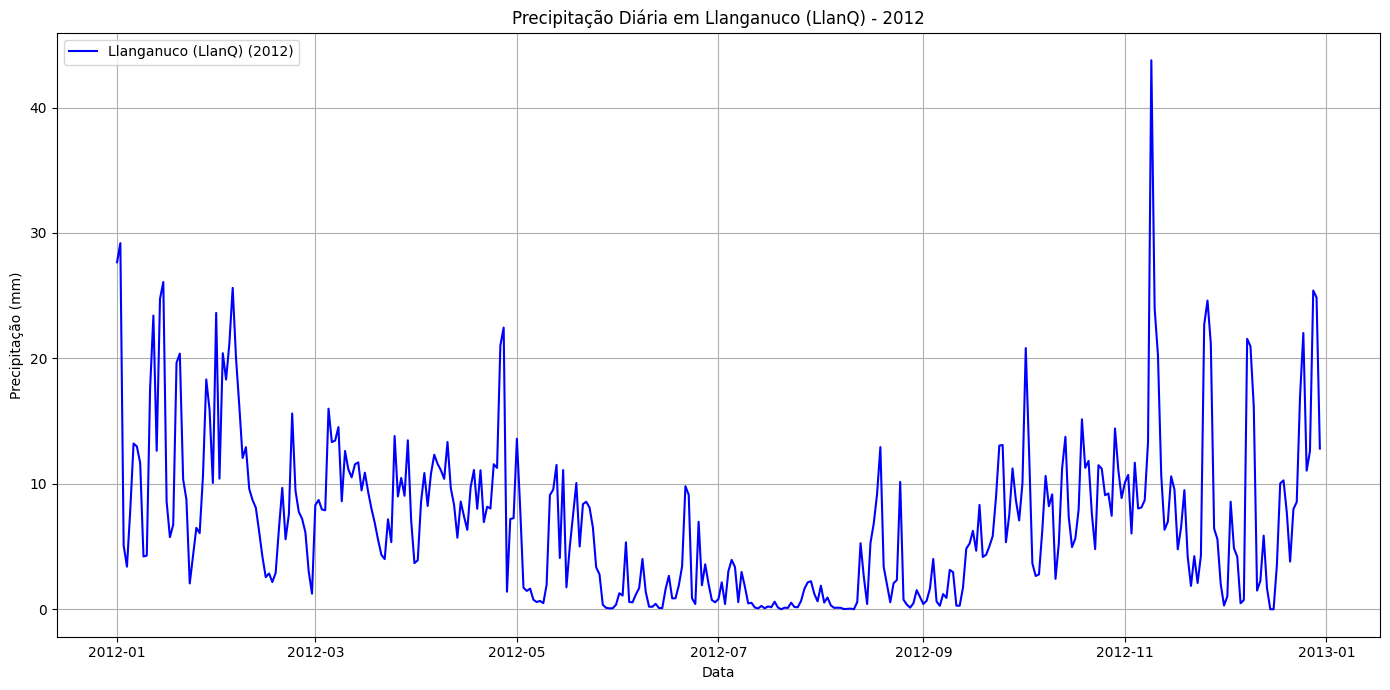

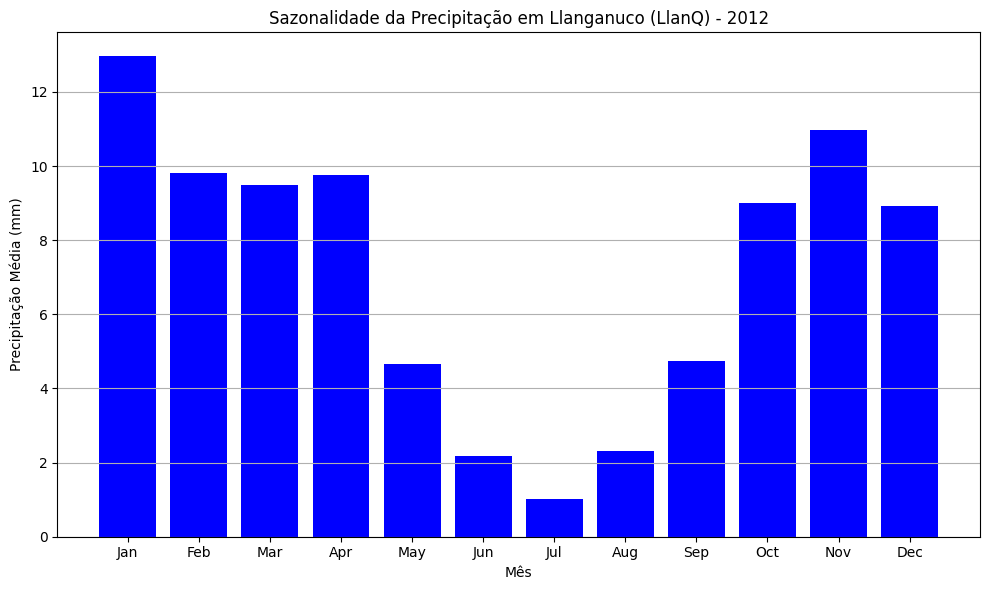

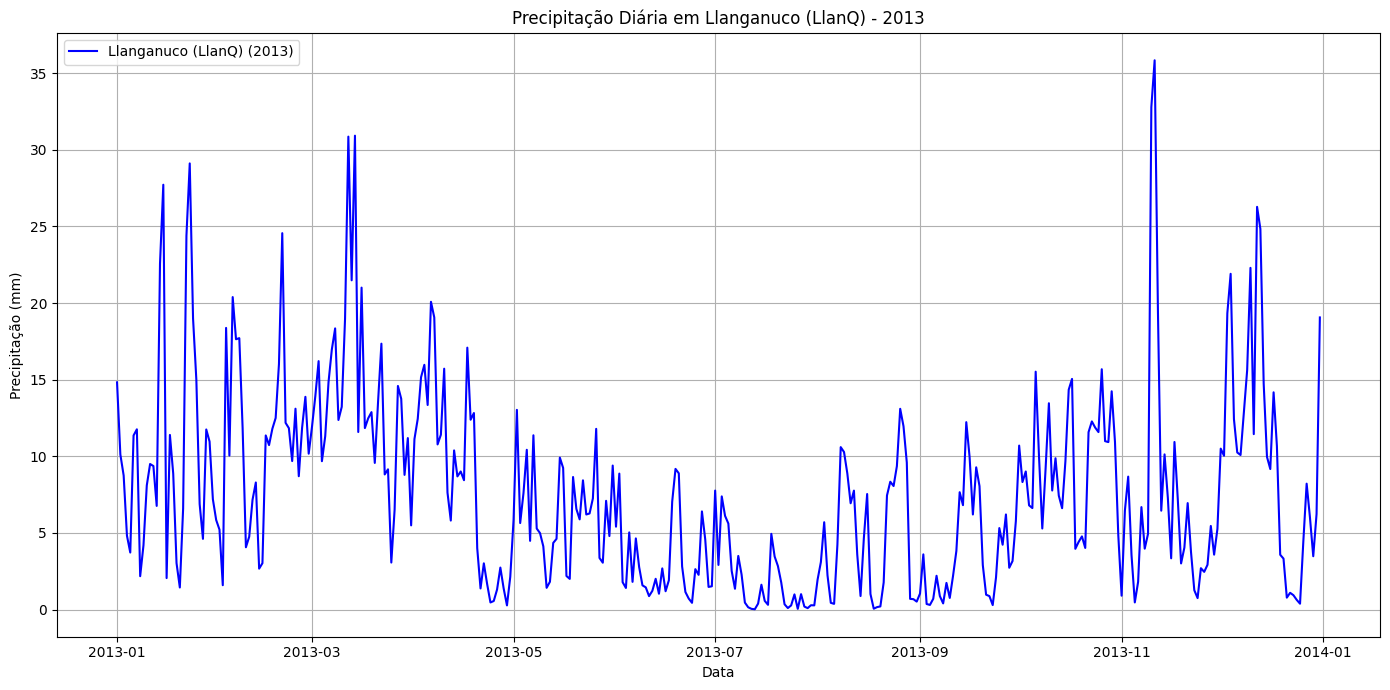

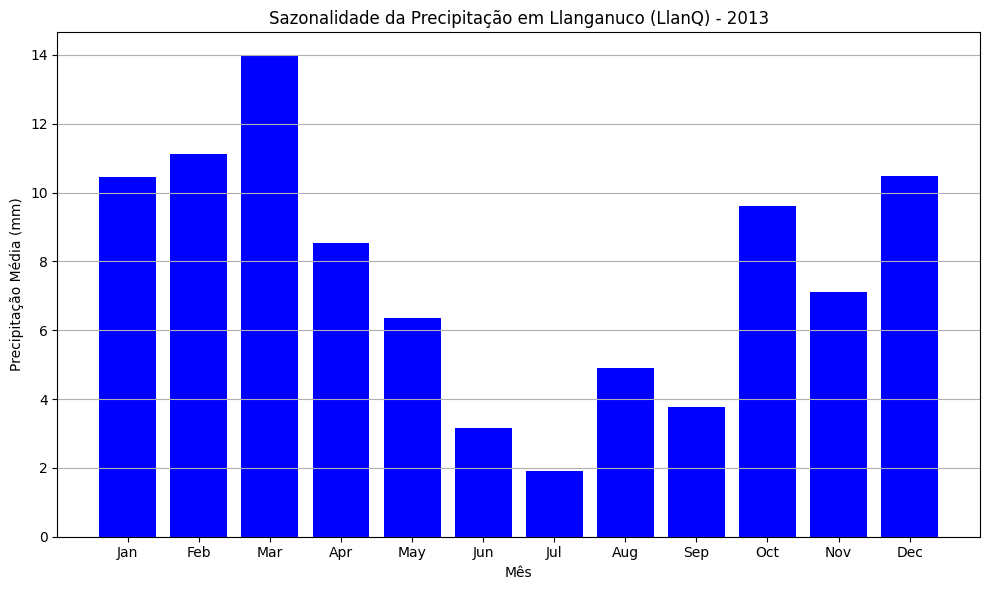

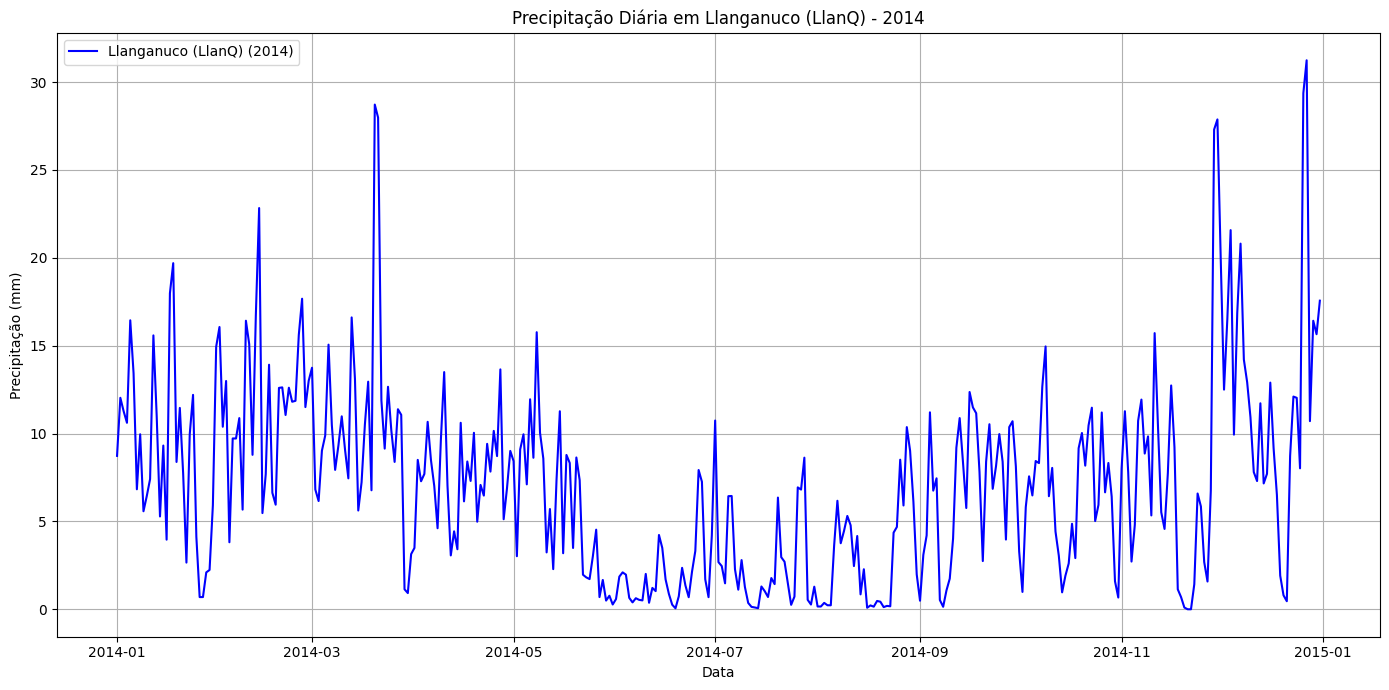

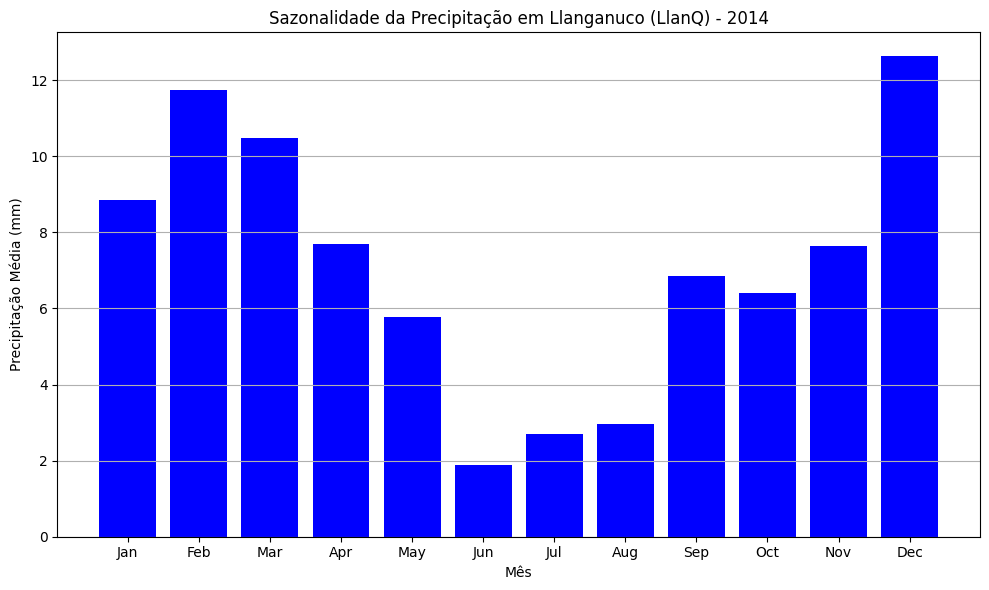

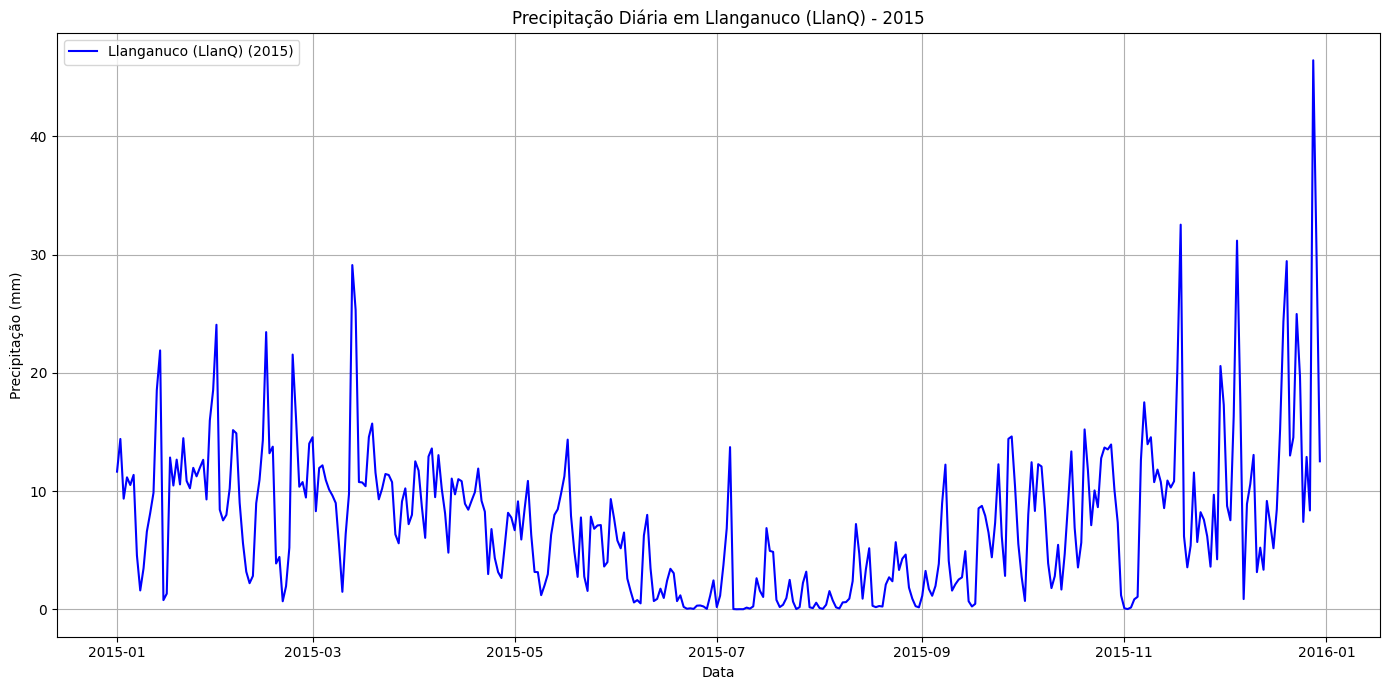

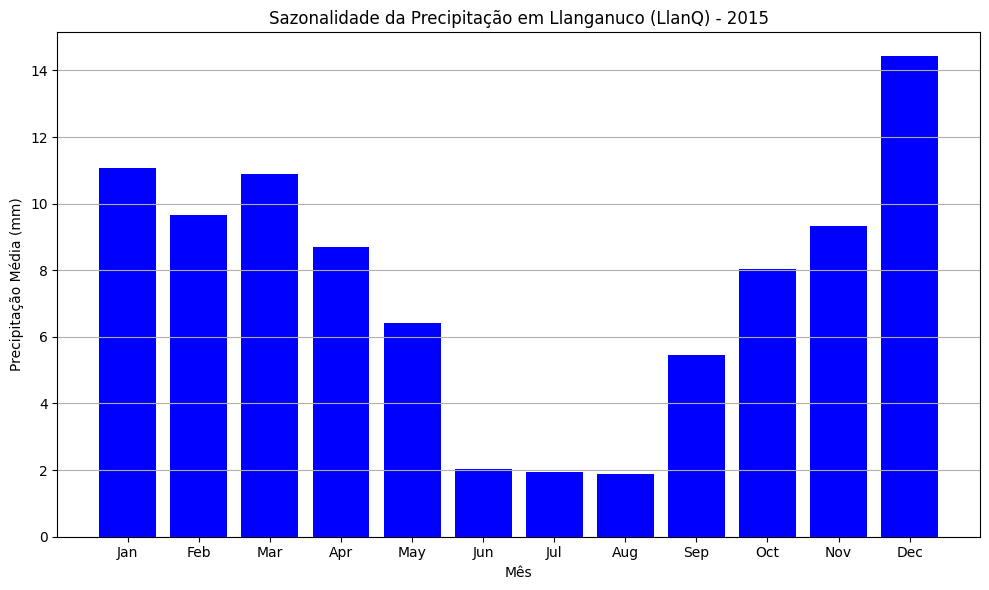

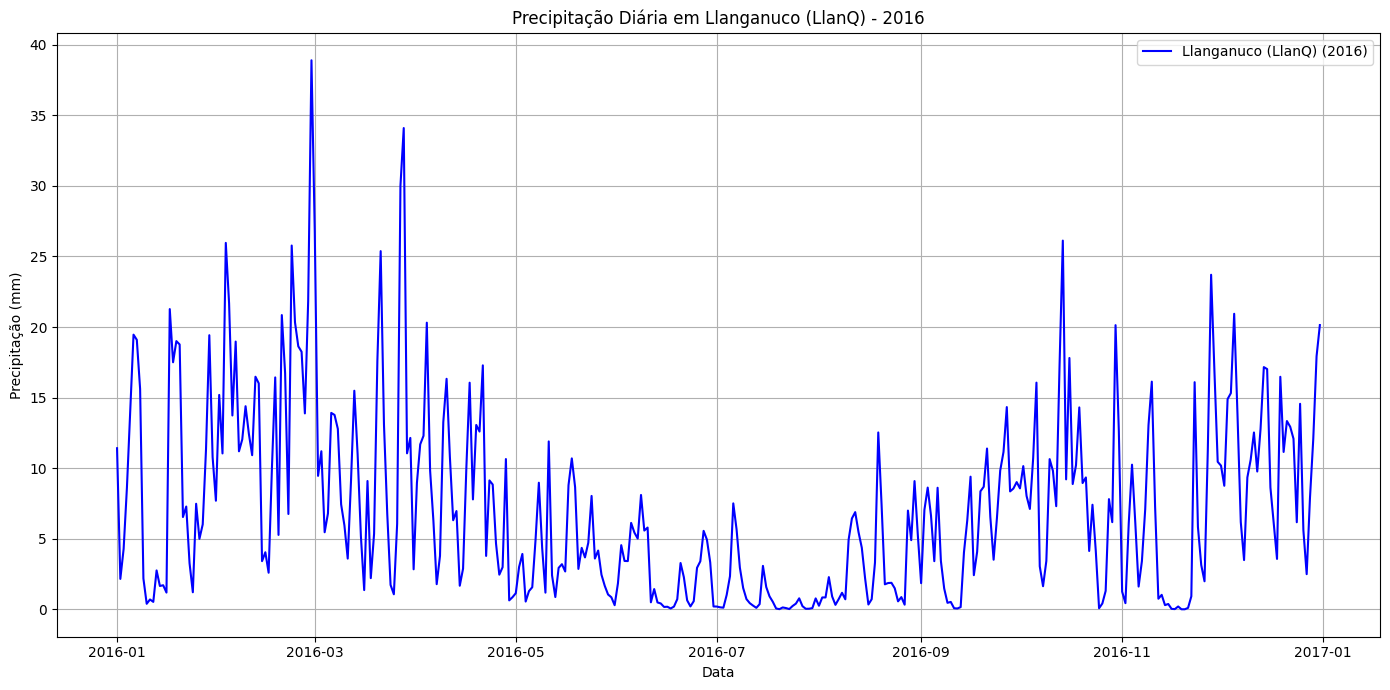

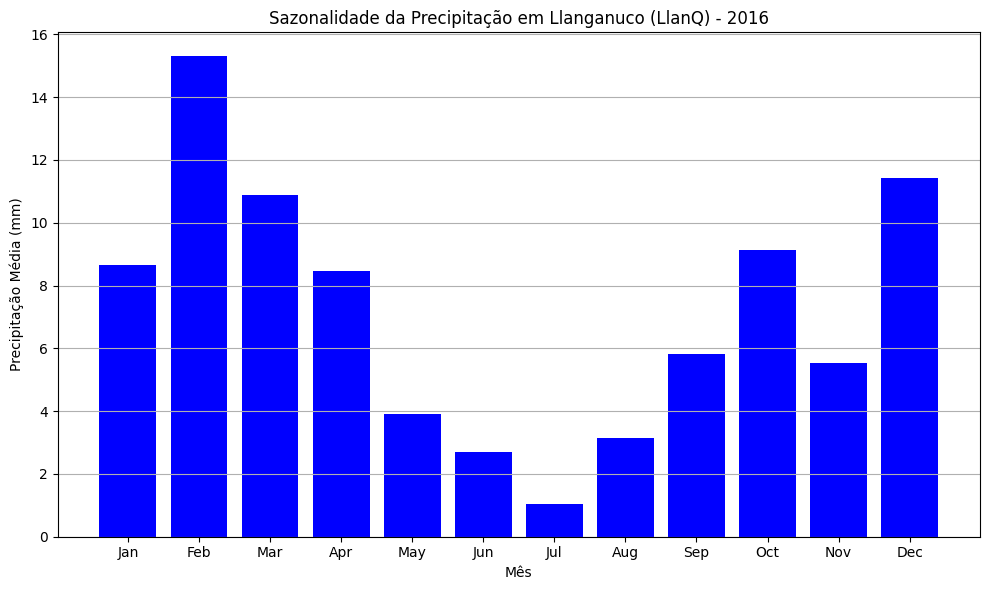

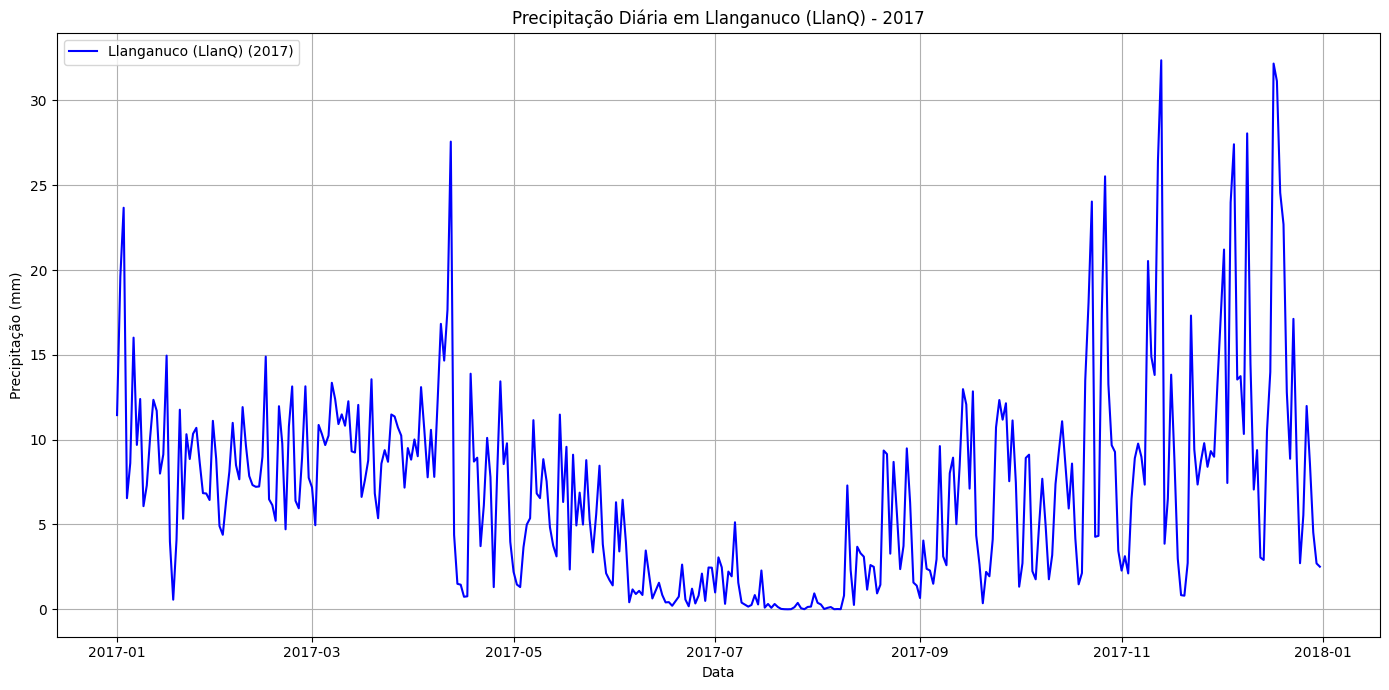

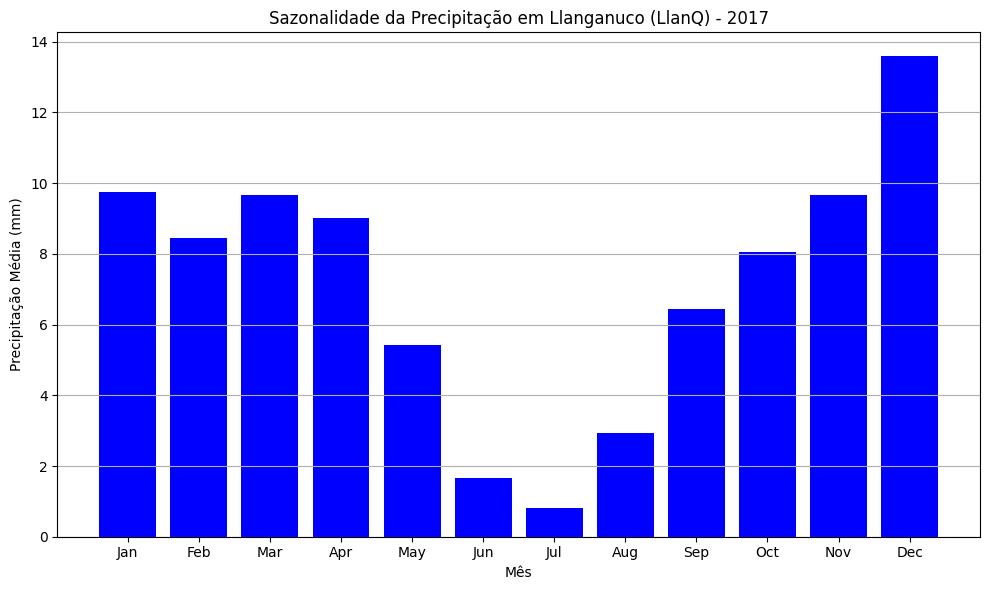

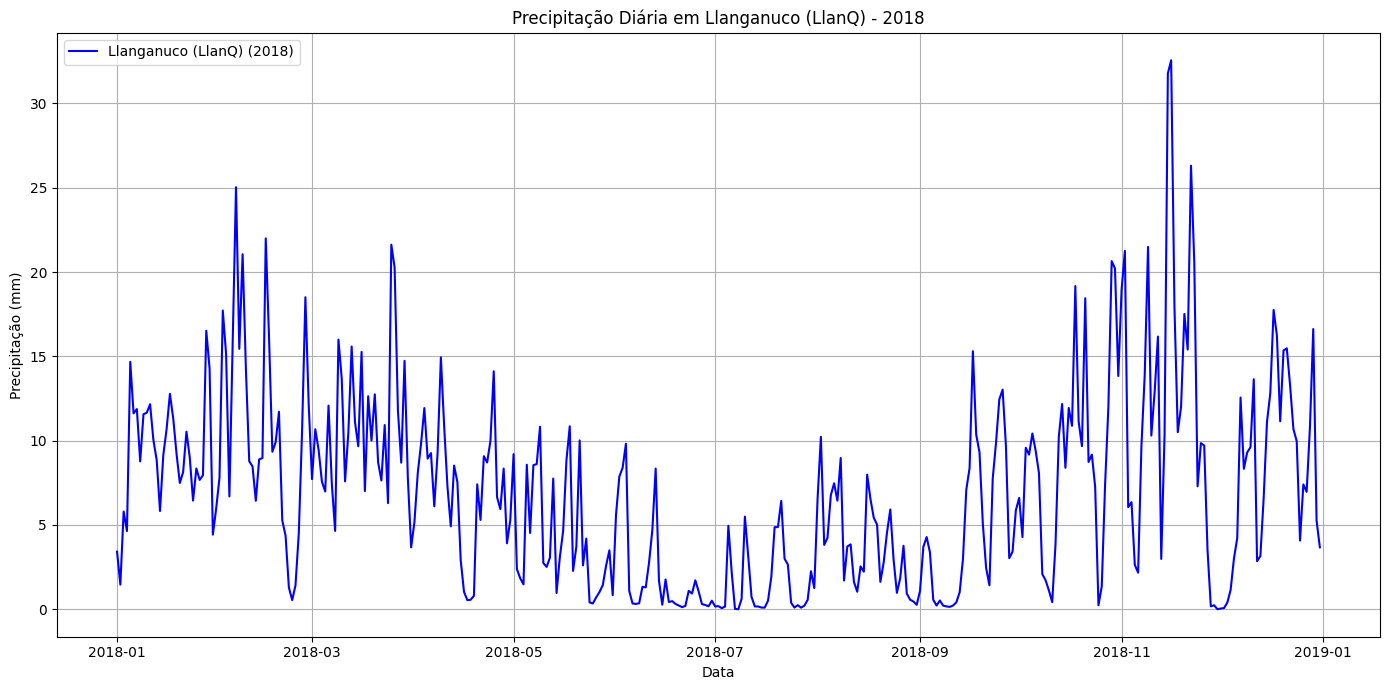

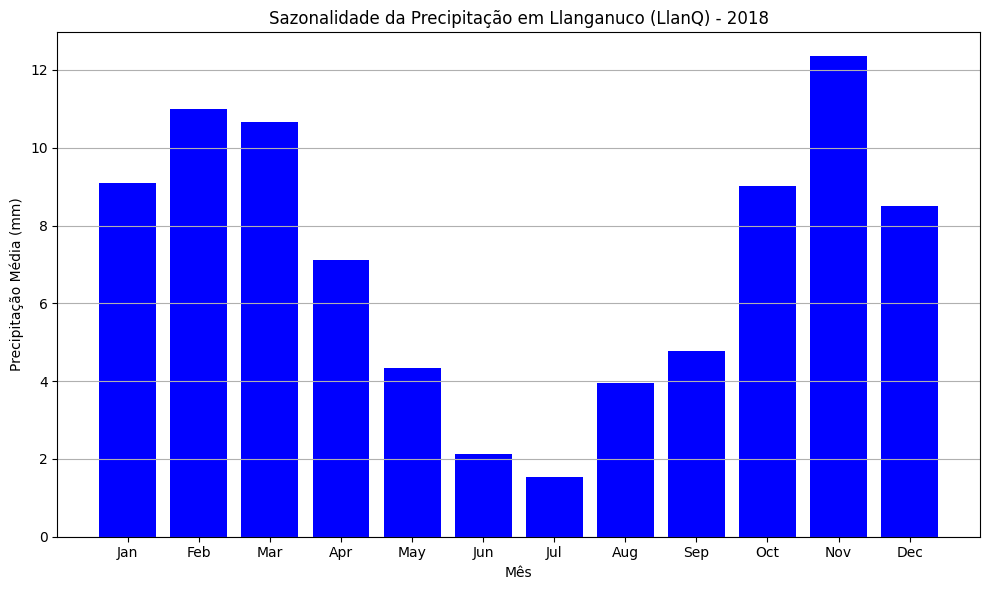

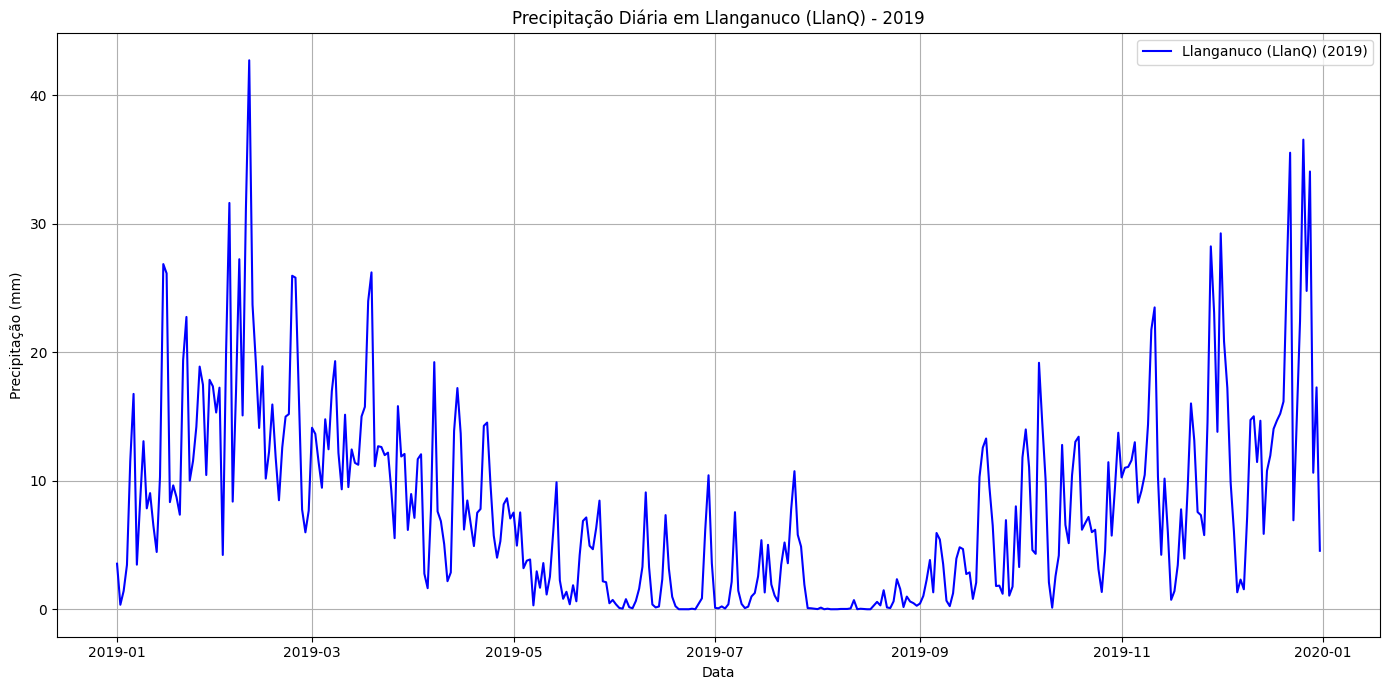

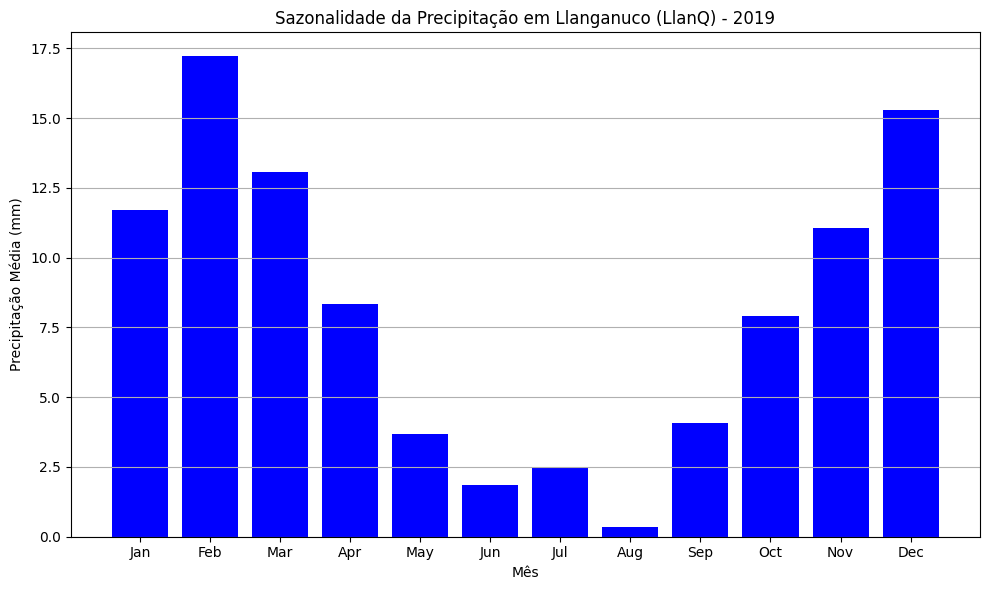

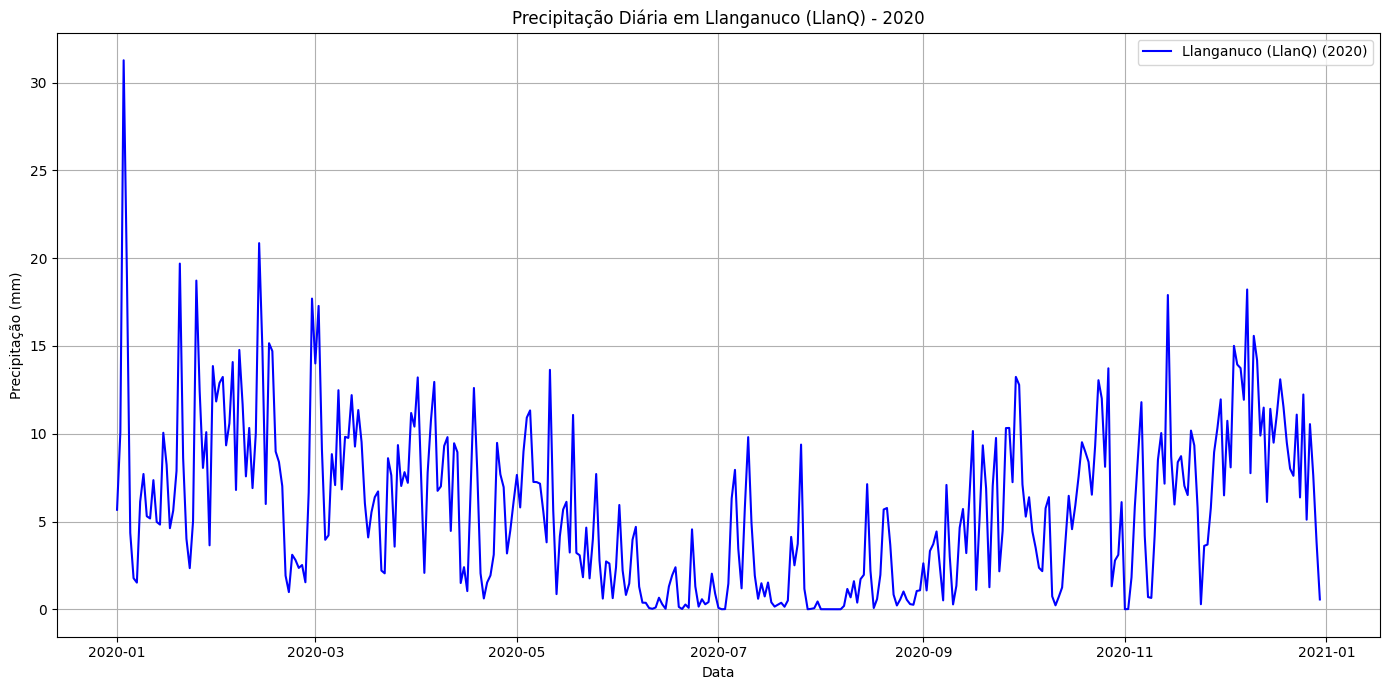

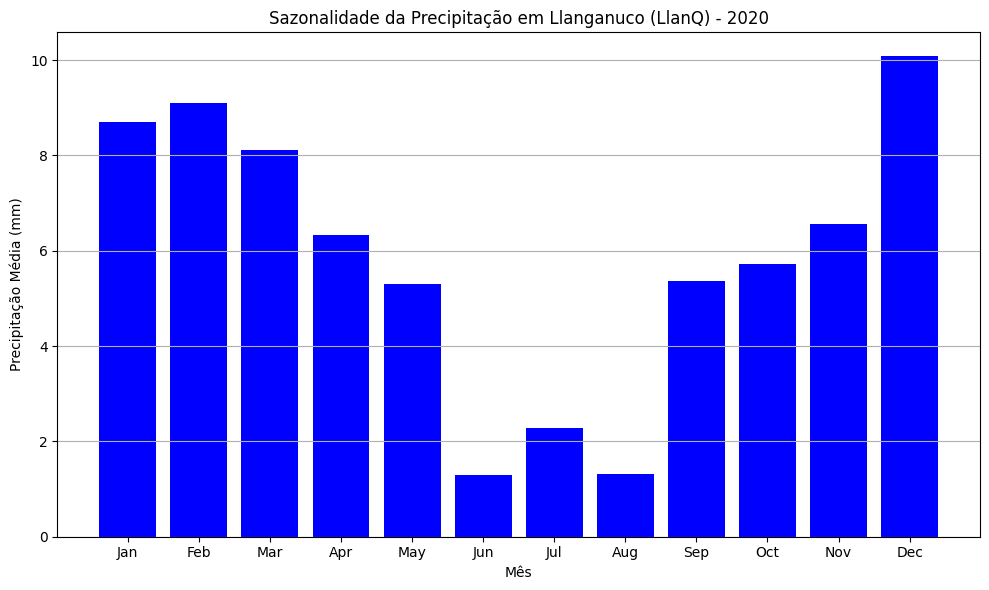

In [9]:
import ee
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar a API do Google Earth Engine
ee.Initialize()

# Definir as coordenadas das estações automáticas
stations = [
    {"name": "Llanganuco (LlanQ)", "lat": -9.07, "lon": -77.65}
]

# Carregar dados ERA5-Land diário
era5_land_daily = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR") \
    .filterDate("2004-01-01", "2020-12-31") \
    .select("total_precipitation_sum")

# Função para processar os dados
def get_daily_precipitation(image_collection, point, start_date, end_date):
    period_collection = image_collection.filterDate(start_date, end_date)
    
    def extract_data(image):
        date = ee.Date(image.get("system:time_start"))
        value = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=point,
            scale=9000,
            maxPixels=1e9
        ).get("total_precipitation_sum")
        return ee.Feature(None, {
            "date": date.format("YYYY-MM-dd"),
            "value": ee.Number(value).multiply(1000)  # Converter para mm
        })
    
    features = period_collection.map(extract_data).getInfo()["features"]
    data = [
        {
            "date": pd.to_datetime(feature["properties"]["date"]),
            "value": feature["properties"]["value"]
        }
        for feature in features if feature["properties"]["value"] is not None
    ]
    return pd.DataFrame(data)

# Definir intervalos menores para evitar o limite de elementos
date_ranges = [
    ("2004-01-01", "2006-12-31"),
    ("2007-01-01", "2009-12-31"),
    ("2010-01-01", "2012-12-31"),
    ("2013-01-01", "2015-12-31"),
    ("2016-01-01", "2020-12-31")
]

# Processar e criar gráficos para cada estação
for station in stations:
    point = ee.Geometry.Point([station["lon"], station["lat"]])
    dfs = []
    
    for start_date, end_date in date_ranges:
        df = get_daily_precipitation(era5_land_daily, point, start_date, end_date)
        dfs.append(df)
    
    # Concatenar todos os períodos
    final_df = pd.concat(dfs)
    
    # Adicionar colunas de ano e mês
    final_df["year"] = final_df["date"].dt.year
    final_df["month"] = final_df["date"].dt.month
    
    # Obter anos únicos
    years = final_df["year"].unique()
    
    # Criar gráficos para cada ano
    for year in years:
        yearly_data = final_df[final_df["year"] == year]
        
        # Gráfico de linha: Precipitação Diária
        plt.figure(figsize=(14, 7))
        plt.plot(yearly_data["date"], yearly_data["value"], color="blue", label=f"{station['name']} ({year})")
        plt.title(f"Precipitação Diária em {station['name']} - {year}")
        plt.xlabel("Data")
        plt.ylabel("Precipitação (mm)")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Gráfico de barras: Sazonalidade Mensal
        monthly_avg = yearly_data.groupby("month")["value"].mean()

        plt.figure(figsize=(10, 6))
        plt.bar(monthly_avg.index, monthly_avg.values, color="blue")
        plt.title(f"Sazonalidade da Precipitação em {station['name']} - {year}")
        plt.xlabel("Mês")
        plt.ylabel("Precipitação Média (mm)")
        plt.xticks(range(1, 13), [
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ])
        plt.grid(axis="y")
        plt.tight_layout()
        plt.show()
